In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
import random
import json
from scipy.interpolate import CubicSpline

In [ ]:
db_username_0 = 'simulationuser'
db_password_0 = 'simulations2024'
db_host_0 = 'localhost'
db_port_0 = '5432'
db_name_0 = 'simulations_data'
table_name_0 = 'composite_data'

In [ ]:
connection_string = f"postgresql://{db_username_0}:{db_password_0}@{db_host_0}:{db_port_0}/{db_name_0}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_0}"
df = pd.read_sql(query, engine)

In [ ]:
df.head()

id       eps  n_0_squared  \
0  1500  0.123943   318.864022   
1  1501  0.123943   318.864022   
2  1502  0.123943   318.864022   
3  1503  0.123943   318.864022   
4  1504  0.123943   318.864022   

                                               psi_e  \
0  [-0.011744609035812982, -0.011215305626181015,...   
1  [-0.008147157474100065, -0.008292099833020762,...   
2  [-0.003781434990007615, -0.001308768972368787,...   
3  [-0.008102021680746106, -0.007577287179778589,...   
4  [-0.0007052290130828054, -0.003475921446700475...   

                                                 b_e  \
0  [-5.517162102724528, -3.1920707854231463, -0.9...   
1  [-0.832904729882089, 0.14071461474575664, 1.27...   
2  [7.429632504232679, 7.616174400779771, 7.45893...   
3  [-13.405475487140006, -12.142974722866745, -10...   
4  [7.188510348955567, 7.255315274332748, 7.40112...   

                                            psi_plus  \
0  [-0.0016475367466768115, -0.002355776502265530...   
1  [0.0006807256129005129, 0.0007313699095774325,...   
2  [0.0017201097552821953, 0.0016973192181066884,...   
3  [-0.007065355563569785, -0.007211423776971252,...   
4  [0.01155266108186768, 0.011468163968599393, 0....   

                                              b_plus  \
0  [10.73076649947905, 10.77581128940965, 10.5402...   
1  [-0.7190970906032216, -0.6095182673572732, -0....   
2  [0.26192796713213556, -0.016191321040263613, -...   
3  [3.432058579711073, 2.9279736455346024, 2.4210...   
4  [-0.9665805895951766, 0.23618988496103174, 1.4...   

                                              u_list  \
0  [0.4615413218450946, 0.4686702377764153, 0.478...   
1  [0.23703131704960073, 0.23479400902756253, 0.2...   
2  [0.3398928494975913, 0.33847860008307173, 0.33...   
3  [0.15021463519080008, 0.17082991418834997, 0.1...   
4  [0.1388431307750241, 0.13278906064134477, 0.12...   

                                              r_list  \
0  [0.6551578220909112, 0.8945764375320215, 1.175...   
1  [-0.18778048603775238, -0.2053401462453807, -0...   
2  [-0.22023434840890527, -0.0752140155360062, 0....   
3  [1.9382048681079675, 1.850150346137473, 2.4148...   
4  [-0.2758572865676108, -1.3496964429839466, 0.2...   

                                      k_e_psi_e_list  \
0  [0.00013793584140409996, 0.0001257830802886475...   
1  [6.637617490778455e-05, 6.875891964078295e-05,...   
2  [1.4299250583653892e-05, 1.7128762230352505e-0...   
3  [6.564275531527996e-05, 5.7415281004836965e-05...   
4  [4.973479608937477e-07, 1.2082029903632324e-05...   

                                        k_e_b_e_list  \
0  [30.43907766773974, 10.189315899151941, 0.8663...   
1  [0.6937302890599556, 0.019800602803046713, 1.6...   
2  [55.199439147950756, 58.00611250309311, 55.635...   
3  [179.70677303631157, 147.4518351201807, 119.05...   
4  [51.67468103704128, 52.63959972996608, 54.7766...   

                                   k_e_psi_plus_list  \
0  [2.7143773316504123e-06, 5.549682928626416e-06...   
1  [4.6338736005877887e-07, 5.349019446353018e-07...   
2  [2.958777570216974e-06, 2.8808925281543e-06, 2...   
3  [4.991924923966652e-05, 5.2004632891066315e-05...   
4  [0.0001334639780725001, 0.00013151878481068138...   

                                     k_e_b_plus_list  \
0  [115.14934966634185, 116.11810894496844, 111.0...   
1  [0.5171006257140178, 0.3715125182422124, 0.293...   
2  [0.06860625996597308, 0.0002621588770288832, 0...   
3  [11.779026094568387, 8.573029668945189, 5.8616...   
4  [0.9342780361821591, 0.055785661757905405, 2.0...   

                            heat_flux_psi_e_b_e_list  \
0  [0.06479691188370344, 0.035800049438924265, 0....   
1  [0.006785805995272157, -0.0011668196334368695,...   
2  [-0.028094672314403355, -0.009967812743890003,...   
3  [0.10861145303751879, 0.09201080669195365, 0.1...   
4  [-0.0050695460589294675, -0.02521890596462674,...   

                         heat_flux_psi_e_b_plus_list  \
0  [-0.1260286571909809, -0.120854016

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df = df.head(5000)

In [ ]:
def average_arrays(*arrays):
    if not arrays:
        raise ValueError("No arrays provided for averaging.")
    
    np_arrays = [np.array(arr) for arr in arrays]
    array_lengths = [len(arr) for arr in np_arrays]

    if len(set(array_lengths)) != 1:
        raise ValueError("All input arrays must have the same length.")
    
    average_array = np.mean(np_arrays, axis=0)
    
    return average_array

In [ ]:
#<U*k_e_psi_e>
temp_u_list = df['u_list'].apply(np.array)
temp_k_e_psi_e_list = df['k_e_psi_e_list'].apply(np.array)
UK_e_psi_e = np.array([i * j for i, j in zip(temp_u_list, temp_k_e_psi_e_list)])
average_UK_e_psi_e = average_arrays(*list(UK_e_psi_e))

In [ ]:
#<U*k_e_psi_plus>
temp_u_list = df['u_list'].apply(np.array)
temp_k_e_psi_plus_list = df['k_e_psi_plus_list'].apply(np.array)
UK_e_psi_plus = np.array([i * j for i, j in zip(temp_u_list, temp_k_e_psi_plus_list)])
average_UK_e_psi_plus = average_arrays(*list(UK_e_psi_plus))

In [ ]:
average_psi_e = average_arrays(*list(df['psi_e']))
average_b_e = average_arrays(*list(df['b_e']))
average_psi_plus = average_arrays(*list(df['psi_plus']))
average_b_plus = average_arrays(*list(df['b_plus']))
average_U = average_arrays(*list(df['u_list']))
average_R = average_arrays(*list(df['r_list']))

average_k_e_psi_e_list = average_arrays(*list(df['k_e_psi_e_list']))
average_k_e_b_e_list = average_arrays(*list(df['k_e_b_e_list']))
average_k_e_psi_plus_list = average_arrays(*list(df['k_e_psi_plus_list']))
average_k_e_b_plus_list = average_arrays(*list(df['k_e_b_plus_list']))
average_heat_flux_psi_e_b_e_list = average_arrays(*list(df['heat_flux_psi_e_b_e_list']))
average_heat_flux_psi_e_b_plus_list = average_arrays(*list(df['heat_flux_psi_e_b_plus_list']))
average_b_e_psi_plus_list = average_arrays(*list(df['b_e_psi_plus_list']))
average_b_e_b_plus_list = average_arrays(*list(df['b_e_b_plus_list']))
average_psi_plus_b_plus_list = average_arrays(*list(df['psi_plus_b_plus_list']))
average_eta = average_arrays(*list(df['eta_list']))

In [ ]:
epsilon = 0.12394270273516043
N_0_squared = 318.8640217310387
r_m = 0.1
k = 2 * np.pi * 6
m = 2 * np.pi * 3
m_u = 2 * np.pi * 7
dt = 0.001
total_time = 200
k_e_square = k**2 + m**2
k_plus_square = k**2 + (m + m_u)**2

In [ ]:
k_e_square

1776.5287921960844

In [ ]:
m_u**2

1934.4424626135142

In [ ]:
p = k / k_e_square
q = -k / k_plus_square
r = k * N_0_squared
s = -k * (k_plus_square - m_u**2) / (2*k_e_square)
t = -k * (m_u**2 - k_e_square) / (2 * k_plus_square)
v = k / 2

In [ ]:
bigW = np.array([[-1, p, 0, 0], [-r, -1, 0, 0], [0, 0, -1, q], [0, 0, r, -1]])
bigL = np.array([[0, 0, s, 0], [0, 0, 0, v], [t, 0, 0, 0], [0, -v, 0, 0]])
bigQ = np.array([[8/k_e_square, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]])

In [ ]:
def create_C_matrix(row):
    length = len(row['k_e_psi_e_list'])  
    matrices = []
    
    for i in range(length):
        ke_psi_e = row['k_e_psi_e_list'][i]
        ke_b_e = row['k_e_b_e_list'][i]
        ke_psi_plus = row['k_e_psi_plus_list'][i]
        ke_b_plus = row['k_e_b_plus_list'][i]
        
        heat_flux_psi_e_b_e = row['heat_flux_psi_e_b_e_list'][i]
        heat_flux_psi_e_b_plus = row['heat_flux_psi_e_b_plus_list'][i]
        b_e_psi_plus = row['b_e_psi_plus_list'][i]
        b_e_b_plus = row['b_e_b_plus_list'][i]
        
        psi_plus_b_plus = row['psi_plus_b_plus_list'][i]
        psi_e_psi_plus = row['r_list'][i] 

        C_matrix = np.array([
            [ke_psi_e, heat_flux_psi_e_b_e, psi_e_psi_plus/(0.25 * k * (k_plus_square - k_e_square)), heat_flux_psi_e_b_plus],
            [heat_flux_psi_e_b_e, ke_b_e, b_e_psi_plus, b_e_b_plus],
            [psi_e_psi_plus/(0.25 * k * (k_plus_square - k_e_square)), b_e_psi_plus, ke_psi_plus, psi_plus_b_plus],
            [heat_flux_psi_e_b_plus, b_e_b_plus, psi_plus_b_plus, ke_b_plus]
        ])
        
        matrices.append(C_matrix)

    return matrices 

In [ ]:
df['C_Matrix'] = df.apply(create_C_matrix, axis = 1)
df.head()

id       eps  n_0_squared  \
0  2039  0.123943   318.864022   
1  9468  0.123943   318.864022   
2  2442  0.123943   318.864022   
3  3060  0.123943   318.864022   
4  4693  0.123943   318.864022   

                                               psi_e  \
0  [-0.004412389522627616, -0.004052608785262689,...   
1  [0.007248136736484029, 0.007997293569911173, 0...   
2  [0.010510772126911837, 0.011053109954606118, 0...   
3  [-0.007053971955446927, -0.00489714755885254, ...   
4  [-9.053282090648399e-05, 0.0034089619639102874...   

                                                 b_e  \
0  [4.250740413268925, 5.22909408032022, 6.064778...   
1  [-2.560792584757198, -3.2888268862900696, -3.9...   
2  [-17.735214021451345, -18.938697842804377, -20...   
3  [-0.08082306136029661, 0.12835414844482904, 0....   
4  [4.622979872573631, 4.55562641092884, 4.186204...   

                                            psi_plus  \
0  [-0.0004165672664172621, -0.000866458891255794...   
1  [-0.0012613865176917783, -0.001517957797712381...   
2  [0.0001589265676485186, 0.00013686180377235976...   
3  [0.004289978092625309, 0.004642636007932392, 0...   
4  [-0.001846816561539476, -0.0018956697558904292...   

                                              b_plus  \
0  [6.843695955821975, 6.354467031723479, 5.75006...   
1  [3.6073245421723183, 3.605978400064985, 3.6215...   
2  [0.2264957262454224, 0.3255861050126083, 0.427...   
3  [-5.760174905725976, -5.171617597288456, -4.55...   
4  [1.1710001479038485, 0.6744601755795513, 0.192...   

                                              u_list  \
0  [0.3920113787071208, 0.3925956127890439, 0.393...   
1  [0.3718356849773913, 0.36744242262986815, 0.36...   
2  [0.024081488071982106, 0.02463575252834726, 0....   
3  [0.39682157742182556, 0.38895847848591636, 0.3...   
4  [0.3013530425432807, 0.3004293212811142, 0.298...   

                                              r_list  \
0  [0.06223450527021877, 0.11889262084175661, 0.0...   
1  [-0.3095614119874744, -0.4110313927209478, -0....   
2  [0.05655921604259968, 0.05121993302817406, 0.0...   
3  [-1.024615825878073, -0.7698038558399728, -0.4...   
4  [0.005661116204822493, -0.21880492505640886, -...   

                                      k_e_psi_e_list  \
0  [1.9469181299393957e-05, 1.642363796638833e-05...   
1  [5.2535486150769344e-05, 6.395670444334259e-05...   
2  [0.00011047633070386677, 0.0001221712396686128...   
3  [4.975852034823175e-05, 2.398205421317539e-05,...   
4  [8.196191661285505e-09, 1.1621021671387083e-05...   

                                        k_e_b_e_list  \
0  [18.068794060997675, 27.343424900839963, 36.78...   
1  [6.557658662147451, 10.816382287984434, 15.493...   
2  [314.53781638668437, 358.67427598104314, 401.4...   
3  [0.006532367247650272, 0.016474787422997208, 0...   
4  [21.371942902220905, 20.753731995952382, 17.52...   

                                   k_e_psi_plus_list  \
0  [1.7352828745035024e-07, 7.507510102362211e-07...   
1  [1.591095947014591e-06, 2.304195875635822e-06,...   
2  [2.5257653904539158e-08, 1.873115333182391e-08...   
3  [1.8403912035205086e-05, 2.1554069102150418e-0...   
4  [3.410731411976493e-06, 3.59356382339768e-06, ...   

                                     k_e_b_plus_list  \
0  [46.83617433573405, 40.3792512572606, 33.06325...   
1  [13.012790352558726, 13.00308022173523, 13.115...   
2  [0.05130031400744133, 0.10600631177728122, 0.1...   
3  [33.179614944555254, 26.745628572583627, 20.77...   
4  [1.371241346390835, 0.45489652844279915, 0.037...   

                            heat_flux_psi_e_b_e_list  \
0  [-0.018755922462917587, -0.021191472608870845,...   
1  [-0.018560974808094537, -0.026301714110278557,...   
2  [-0.1864107932014868, -0.20933150965357847, -0...   
3  [0.0005701236081888985, -0.0006285692047251911...   
4  [-0.00041853140885798873, 0.015529957156641551...   

                         heat_flux_psi_e_b_plus_list  \
0  [-0.030197052331517867, -0.0257521

In [ ]:
C_Mat_Arr = df['C_Matrix']
C_Mat_Arr

0       [[[1.9469181299393957e-05, -0.0187559224629175...
1       [[[5.2535486150769344e-05, -0.0185609748080945...
2       [[[0.00011047633070386677, -0.1864107932014868...
3       [[[4.975852034823175e-05, 0.000570123608188898...
4       [[[8.196191661285505e-09, -0.00041853140885798...
                              ...                        
4995    [[[7.332434531985948e-05, 0.010491853008813886...
4996    [[[3.7480111769132093e-06, -0.0079539504468846...
4997    [[[0.0002319793339028844, -0.05629879255012069...
4998    [[[5.6027828323948465e-05, 0.01302826010046392...
4999    [[[0.00010301278260312192, 0.01661998043348157...
Name: C_Matrix, Length: 5000, dtype: object

In [ ]:
#<WC>

C_Mat_Arr_Multiplied = C_Mat_Arr.apply(lambda matrix_list: [bigW @ matrix for matrix in matrix_list])
C_Mat_Arr_Multiplied[0][0]


array([[-4.17482218e-04,  4.02187641e-01, -3.94138879e-05,
         6.47522470e-01],
       [-2.15280972e-01,  2.07394095e+02, -2.03243630e-02,
         3.33904682e+02],
       [ 2.10191802e-04, -2.02491368e-01,  1.98439018e-05,
        -3.26011287e-01],
       [ 5.22921346e-02, -5.03763978e+01,  4.93682424e-03,
        -8.11060466e+01]])

In [ ]:
average_WC = np.mean(C_Mat_Arr_Multiplied.tolist(), axis = 0)
average_WC


array([[[-2.40741916e-04,  1.20045195e+00,  5.87254848e-05,
         -8.72009591e-02],
        [-1.12634803e+00,  2.67254755e+01, -2.40140749e-02,
          1.69458418e+02],
        [ 9.44446487e-05,  3.05364845e-02,  4.33371084e-07,
         -1.35028282e-01],
        [ 3.48651759e-02,  3.90185220e+01,  1.14677971e-01,
         -3.63048137e+01]],

       [[-2.46760125e-04,  1.20468928e+00,  5.64191413e-05,
         -8.26193912e-02],
        [-1.12991574e+00,  2.97668137e+01, -2.77696368e-02,
          1.68152286e+02],
        [ 9.34901133e-05,  2.90842270e-02,  1.21193035e-06,
         -1.34103083e-01],
        [ 3.86239918e-02,  3.76732737e+01,  1.15005071e-01,
         -3.75525278e+01]],

       [[-2.49094485e-04,  1.21023852e+00,  5.33481097e-05,
         -8.06406318e-02],
        [-1.10708004e+00,  3.19037667e+01, -2.98309917e-02,
          1.62281509e+02],
        [ 8.99457653e-05,  2.84071859e-02,  1.79851724e-06,
         -1.32840103e-01],
        [ 4.03427039e-02,  3.59213686e+

In [ ]:
average_WC_term = np.mean(average_WC, axis=0)
average_WC_term

array([[-3.19123920e-04,  1.69706546e+00,  7.84526759e-05,
         2.46200310e-02],
       [-1.56179350e+00,  2.72043724e+01,  1.94180361e-02,
        -7.44991438e+01],
       [-4.07554599e-05, -1.37638848e-02, -2.35612054e-07,
        -1.74238957e-01],
       [-2.91019054e-02,  4.19095882e+01,  1.29075904e-01,
        -4.27943906e+01]])

In [ ]:
#<CW^T>
C_Mat_Arr_Multiplied = C_Mat_Arr.apply(lambda matrix_list: [matrix @ np.transpose(bigW) for matrix in matrix_list])
C_Mat_Arr_Multiplied[0][0]


array([[-4.17482218e-04, -2.15280972e-01,  2.10191802e-04,
         5.22921346e-02],
       [ 4.02187641e-01,  2.07394095e+02, -2.02491368e-01,
        -5.03763978e+01],
       [-3.94138879e-05, -2.03243630e-02,  1.98439018e-05,
         4.93682424e-03],
       [ 6.47522470e-01,  3.33904682e+02, -3.26011287e-01,
        -8.11060466e+01]])

In [ ]:
average_WC_Transpose = np.mean(C_Mat_Arr_Multiplied.tolist(), axis = 0)
average_WC_Transpose


array([[[-2.40741916e-04, -1.12634803e+00,  9.44446487e-05,
          3.48651759e-02],
        [ 1.20045195e+00,  2.67254755e+01,  3.05364845e-02,
          3.90185220e+01],
        [ 5.87254848e-05, -2.40140749e-02,  4.33371084e-07,
          1.14677971e-01],
        [-8.72009591e-02,  1.69458418e+02, -1.35028282e-01,
         -3.63048137e+01]],

       [[-2.46760125e-04, -1.12991574e+00,  9.34901133e-05,
          3.86239918e-02],
        [ 1.20468928e+00,  2.97668137e+01,  2.90842270e-02,
          3.76732737e+01],
        [ 5.64191413e-05, -2.77696368e-02,  1.21193035e-06,
          1.15005071e-01],
        [-8.26193912e-02,  1.68152286e+02, -1.34103083e-01,
         -3.75525278e+01]],

       [[-2.49094485e-04, -1.10708004e+00,  8.99457653e-05,
          4.03427039e-02],
        [ 1.21023852e+00,  3.19037667e+01,  2.84071859e-02,
          3.59213686e+01],
        [ 5.33481097e-05, -2.98309917e-02,  1.79851724e-06,
          1.15456037e-01],
        [-8.06406318e-02,  1.62281509e+

In [ ]:
average_WC_Transpose_term = np.mean(average_WC_Transpose, axis=0)
average_WC_Transpose_term

array([[-3.19123920e-04, -1.56179350e+00, -4.07554599e-05,
        -2.91019054e-02],
       [ 1.69706546e+00,  2.72043724e+01, -1.37638848e-02,
         4.19095882e+01],
       [ 7.84526759e-05,  1.94180361e-02, -2.35612054e-07,
         1.29075904e-01],
       [ 2.46200310e-02, -7.44991438e+01, -1.74238957e-01,
        -4.27943906e+01]])

In [ ]:
#<ULC>
C_Mat_Arr_ULC_Multiplied = []

for idx, (matrix_list, u_list) in enumerate(zip(C_Mat_Arr, df['u_list'])):
    result = []
    for u, matrix in zip(u_list, matrix_list):
        uL = u * bigL  # Broadcast scalar u across the matrix L
        result_matrix = uL @ matrix  # Matrix multiplication
        result.append(result_matrix)
    C_Mat_Arr_ULC_Multiplied.append(result)

average_ULC = np.mean(C_Mat_Arr_ULC_Multiplied, axis = 0)
average_ULC


array([[[-2.02533406e-05,  9.34255047e-03, -1.22914457e-04,
          2.31122706e-02],
        [-1.15333165e-01, -3.00593086e+01, -1.19546227e-02,
          1.46388536e+02],
        [-1.68143940e-05,  1.32228733e-03, -3.08113701e-07,
          3.39215193e-03],
        [ 4.49577691e-02, -3.30118351e+02,  4.83235369e-03,
          3.00593086e+01]],

       [[-2.66870279e-05,  1.10648997e-02, -1.23984958e-04,
          2.54014679e-02],
        [-1.14811708e-01, -2.81619809e+01, -1.31386903e-02,
          1.45399423e+02],
        [-1.69651188e-05,  1.42265007e-03, -4.05989268e-07,
          3.37681493e-03],
        [ 4.83701025e-02, -3.32633512e+02,  5.72322398e-03,
          2.81619809e+01]],

       [[-3.10530566e-05,  1.38308162e-02, -1.25499295e-04,
          2.70136951e-02],
        [-1.11132374e-01, -2.72039661e+01, -1.39726009e-02,
          1.43856465e+02],
        [-1.67212200e-05,  1.49199940e-03, -4.72409583e-07,
          3.26859923e-03],
        [ 5.07279798e-02, -3.36069810e+

In [ ]:
average_ULC_term = np.mean(average_ULC, axis=0)
average_ULC_term


array([[-1.55462873e-05,  7.62195269e-02, -2.95178117e-05,
         1.33806773e-02],
       [-1.98113945e-01, -3.97464378e+01, -6.92103998e-03,
         1.53727499e+01],
       [-1.05905549e-07,  3.52384912e-04, -2.36505384e-07,
         5.82688073e-03],
       [ 1.19810870e-02,  1.79424187e+01,  3.94238932e-02,
         3.97464378e+01]])

In [ ]:
#<UCL^T>
C_Mat_Arr_UCLT_Multiplied = []

L_transposed = bigL.T

for idx, (matrix_list, u_list) in enumerate(zip(C_Mat_Arr, df['u_list'])):
    result = []
    for u, matrix in zip(u_list, matrix_list):
        uC = u * matrix  # Multiply the scalar u with the matrix C
        result_matrix = uC @ L_transposed  # Multiply by the transposed matrix L
        result.append(result_matrix)
    C_Mat_Arr_UCLT_Multiplied.append(result)

average_UCLT = np.mean(C_Mat_Arr_UCLT_Multiplied, axis = 0)
average_UCLT
average_UCLT_term = np.mean(average_UCLT, axis=0)
average_UCLT_term


array([[-1.55462873e-05, -1.98113945e-01, -1.05905549e-07,
         1.19810870e-02],
       [ 7.62195269e-02, -3.97464378e+01,  3.52384912e-04,
         1.79424187e+01],
       [-2.95178117e-05, -6.92103998e-03, -2.36505384e-07,
         3.94238932e-02],
       [ 1.33806773e-02,  1.53727499e+01,  5.82688073e-03,
         3.97464378e+01]])

In [ ]:
average_C_Matrix = np.mean(df['C_Matrix'].tolist(), axis = 0)
average_C_Matrix

array([[[ 9.42733986e-05, -6.90216626e-03,  1.76057975e-06,
         -1.37014396e-02],
        [-6.90216626e-03,  5.62447087e+01,  2.85033864e-03,
         -4.75491352e+00],
        [ 1.76057975e-06,  2.85033864e-03,  9.42311410e-06,
         -1.40374945e-03],
        [-1.37014396e-02, -4.75491352e+00, -1.40374945e-03,
          1.94304954e+01]],

       [[ 9.45925328e-05, -7.17072885e-03,  2.08078535e-06,
         -1.36110991e-02],
        [-7.17072885e-03,  5.64317321e+01,  2.75674410e-03,
         -4.53475502e+00],
        [ 2.08078535e-06,  2.75674410e-03,  9.44089035e-06,
         -1.51716265e-03],
        [-1.36110991e-02, -4.53475502e+00, -1.51716265e-03,
          1.93148818e+01]],

       [[ 9.27093980e-05, -7.36947363e-03,  2.26358874e-06,
         -1.31323517e-02],
        [-7.36947363e-03,  5.66838682e+01,  2.62063955e-03,
         -4.41894774e+00],
        [ 2.26358874e-06,  2.62063955e-03,  9.47109801e-06,
         -1.60500584e-03],
        [-1.31323517e-02, -4.41894774e+

In [ ]:
average_C_matrix = np.array(average_C_Matrix)

# Time step (assuming it's constant)
delta_t = .01  # Replace with your actual time step

# Initialize an array to store the time derivatives
dC_dt = np.zeros_like(average_C_matrix)

# Forward difference for the first time point
dC_dt[0] = (average_C_matrix[1] - average_C_matrix[0]) / delta_t

# Central difference for the intermediate points
for i in range(1, len(average_C_matrix) - 1):
    dC_dt[i] = (average_C_matrix[i + 1] - average_C_matrix[i - 1]) / (2 * delta_t)

# Backward difference for the last time point
dC_dt[-1] = (average_C_matrix[-1] - average_C_matrix[-2]) / delta_t
dC_dt.shape

(1000, 4, 4)

In [ ]:
average_C_matrix.shape

(1000, 4, 4)

In [ ]:
s1 = average_WC + average_WC_Transpose + average_ULC + average_UCLT + epsilon*bigQ
s1

array([[[ 3.61437695e-05, -3.18866879e-02,  1.34412826e-05,
          1.57342565e-02],
        [-3.18866879e-02, -6.66766610e+00, -4.10992582e-03,
          2.47471245e+01],
        [ 1.34412826e-05, -4.10992582e-03,  2.50514767e-07,
         -1.21258053e-02],
        [ 1.57342565e-02,  2.47471245e+01, -1.21258053e-02,
         -1.24910103e+01]],

       [[ 1.12399761e-05, -2.89732740e-02,  8.95917798e-06,
          2.97761710e-02],
        [-2.89732740e-02,  3.20966565e+00, -1.04014501e-02,
          1.85914704e+01],
        [ 8.95917798e-06, -1.04014501e-02,  1.61188217e-06,
         -9.99797355e-03],
        [ 2.97761710e-02,  1.85914704e+01, -9.99797355e-03,
         -1.87810938e+01]],

       [[-2.16080198e-06,  5.85691858e-03,  1.07335966e-06,
          3.74437470e-02],
        [ 5.85691858e-03,  9.39960105e+00, -1.39044074e-02,
          5.98953171e+00],
        [ 1.07335966e-06, -1.39044074e-02,  2.65221531e-06,
         -6.96159570e-03],
        [ 3.74437470e-02,  5.98953171e+

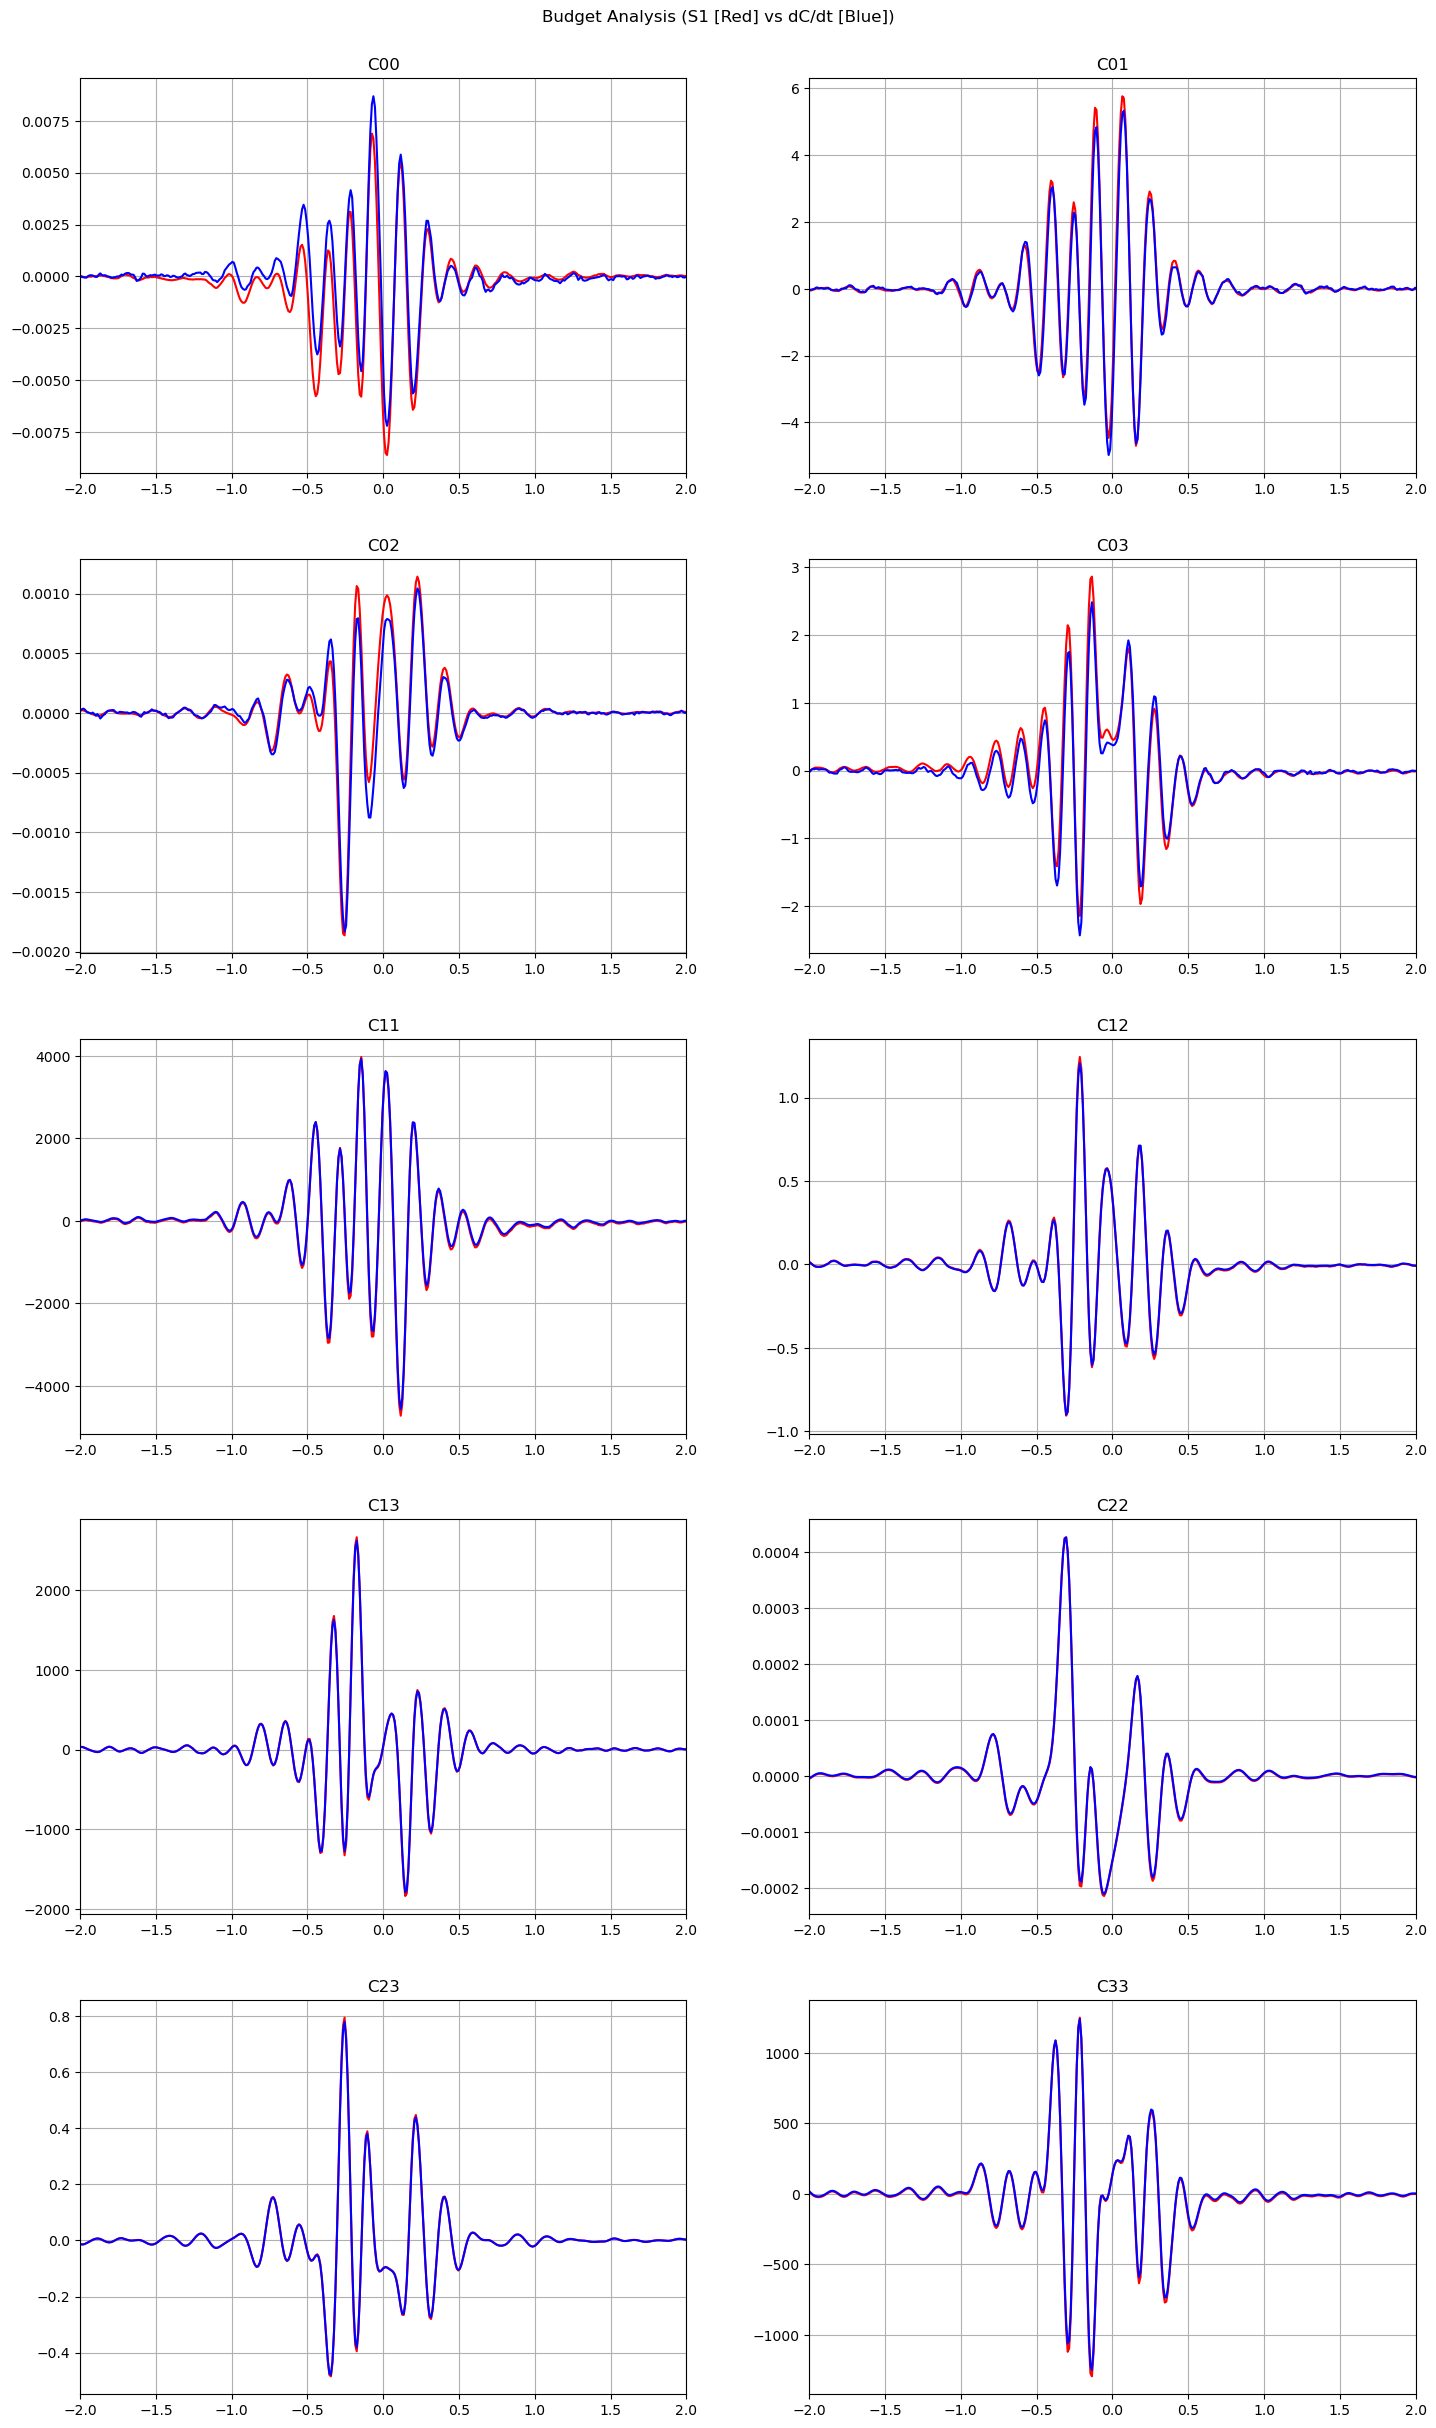

In [ ]:
time_array = np.linspace(-5, 5,  int(10/.01))
# time_array = np.arange(2000/10, 2000/10) * dt * 10
#fig, axs = plt.subplots(1,1, figsize = (8, 12))
x_limit = (-2, 2)

fig, axs = plt.subplots(5, 2, figsize=(15, 25))


axs[0, 0].plot(time_array, s1[:, 0, 0],'r')
axs[0, 0].plot(time_array, dC_dt[:, 0, 0],'b')
axs[0, 0].set_title(f'C00')
axs[0, 0].set_xlim(x_limit)
axs[0, 0].grid()

axs[0, 1].plot(time_array, s1[:, 0, 1],'r')
axs[0, 1].plot(time_array, dC_dt[:, 0, 1],'b')
axs[0, 1].set_title(f'C01')
axs[0, 1].set_xlim(x_limit)
axs[0, 1].grid()

axs[1, 0].plot(time_array, s1[:, 0, 2],'r')
axs[1, 0].plot(time_array, dC_dt[:, 0, 2],'b')
axs[1, 0].set_title(f'C02')
axs[1, 0].set_xlim(x_limit)
axs[1, 0].grid()

axs[1, 1].plot(time_array, s1[:, 0, 3],'r')
axs[1, 1].plot(time_array, dC_dt[:, 0, 3],'b')
axs[1, 1].set_title(f'C03')
axs[1, 1].set_xlim(x_limit)
axs[1, 1].grid()

axs[2, 0].plot(time_array, s1[:, 1, 1],'r')
axs[2, 0].plot(time_array, dC_dt[:, 1, 1],'b')
axs[2, 0].set_title(f'C11')
axs[2, 0].set_xlim(x_limit)
axs[2, 0].grid()

axs[2, 1].plot(time_array, s1[:, 1, 2],'r')
axs[2, 1].plot(time_array, dC_dt[:, 1, 2],'b')
axs[2, 1].set_title(f'C12')
axs[2, 1].set_xlim(x_limit)
axs[2, 1].grid()

axs[3, 0].plot(time_array, s1[:, 1, 3],'r')
axs[3, 0].plot(time_array, dC_dt[:, 1, 3],'b')
axs[3, 0].set_title(f'C13')
axs[3, 0].set_xlim(x_limit)
axs[3, 0].grid()

axs[3, 1].plot(time_array, s1[:, 2, 2],'r')
axs[3, 1].plot(time_array, dC_dt[:, 2, 2],'b')
axs[3, 1].set_title(f'C22')
axs[3, 1].set_xlim(x_limit)
axs[3, 1].grid()

axs[4, 0].plot(time_array, s1[:, 2, 3],'r')
axs[4, 0].plot(time_array, dC_dt[:, 2, 3],'b')
axs[4, 0].set_title(f'C23')
axs[4, 0].set_xlim(x_limit)
axs[4, 0].grid()

axs[4, 1].plot(time_array, s1[:, 3, 3],'r')
axs[4, 1].plot(time_array, dC_dt[:, 3, 3],'b')
axs[4, 1].set_title(f'C33')
axs[4, 1].set_xlim(x_limit)
axs[4, 1].grid()


plt.suptitle(f"Budget Analysis (S1 [Red] vs dC/dt [Blue])")



#plt.subplots_adjust(wspace=.4)
#plt.subplots_adjust(hspace=.4)
plt.tight_layout(pad = 3)
plt.show()

In [ ]:
#W<C> term
W_C = np.array([bigW @ C for C in average_C_Matrix])
W_C

array([[[-2.40741916e-04,  1.20045195e+00,  5.87254848e-05,
         -8.72009591e-02],
        [-1.12634803e+00,  2.67254755e+01, -2.40140749e-02,
          1.69458418e+02],
        [ 9.44446487e-05,  3.05364845e-02,  4.33371084e-07,
         -1.35028282e-01],
        [ 3.48651759e-02,  3.90185220e+01,  1.14677971e-01,
         -3.63048137e+01]],

       [[-2.46760125e-04,  1.20468928e+00,  5.64191413e-05,
         -8.26193912e-02],
        [-1.12991574e+00,  2.97668137e+01, -2.77696368e-02,
          1.68152286e+02],
        [ 9.34901133e-05,  2.90842270e-02,  1.21193035e-06,
         -1.34103083e-01],
        [ 3.86239918e-02,  3.76732737e+01,  1.15005071e-01,
         -3.75525278e+01]],

       [[-2.49094485e-04,  1.21023852e+00,  5.33481097e-05,
         -8.06406318e-02],
        [-1.10708004e+00,  3.19037667e+01, -2.98309917e-02,
          1.62281509e+02],
        [ 8.99457653e-05,  2.84071859e-02,  1.79851724e-06,
         -1.32840103e-01],
        [ 4.03427039e-02,  3.59213686e+

In [ ]:
#<C>W^T
CW_T = np.array([C @ bigW.T for C in average_C_Matrix])
CW_T

array([[[-2.40741916e-04, -1.12634803e+00,  9.44446487e-05,
          3.48651759e-02],
        [ 1.20045195e+00,  2.67254755e+01,  3.05364845e-02,
          3.90185220e+01],
        [ 5.87254848e-05, -2.40140749e-02,  4.33371084e-07,
          1.14677971e-01],
        [-8.72009591e-02,  1.69458418e+02, -1.35028282e-01,
         -3.63048137e+01]],

       [[-2.46760125e-04, -1.12991574e+00,  9.34901133e-05,
          3.86239918e-02],
        [ 1.20468928e+00,  2.97668137e+01,  2.90842270e-02,
          3.76732737e+01],
        [ 5.64191413e-05, -2.77696368e-02,  1.21193035e-06,
          1.15005071e-01],
        [-8.26193912e-02,  1.68152286e+02, -1.34103083e-01,
         -3.75525278e+01]],

       [[-2.49094485e-04, -1.10708004e+00,  8.99457653e-05,
          4.03427039e-02],
        [ 1.21023852e+00,  3.19037667e+01,  2.84071859e-02,
          3.59213686e+01],
        [ 5.33481097e-05, -2.98309917e-02,  1.79851724e-06,
          1.15456037e-01],
        [-8.06406318e-02,  1.62281509e+

In [ ]:
U = np.mean(average_U)
U

0.02270042262516259

In [ ]:
#<U>L<C>
result_ULC = np.array([U * (bigL @ C) for C in average_C_Matrix])
result_ULC

array([[[-1.45645646e-06, -2.35796994e-03, -7.79536140e-06,
          1.16126518e-03],
        [-5.86274854e-03, -2.03459367e+00, -6.00654404e-04,
          8.31417075e+00],
        [-1.18643872e-06,  8.68643482e-05, -2.21570456e-08,
          1.72433781e-04],
        [ 2.95338784e-03, -2.40667107e+01, -1.21963963e-03,
          2.03459367e+00]],

       [[-1.72134962e-06, -2.28054296e-03, -7.81006697e-06,
          1.25508734e-03],
        [-5.82409247e-03, -1.94038941e+00, -6.49183106e-04,
          8.26470050e+00],
        [-1.19045505e-06,  9.02442312e-05, -2.61868603e-08,
          1.71296837e-04],
        [ 3.06830386e-03, -2.41467367e+01, -1.17959119e-03,
          1.94038941e+00]],

       [[-1.87257547e-06, -2.16794917e-03, -7.83505656e-06,
          1.32775645e-03],
        [-5.61923988e-03, -1.89083630e+00, -6.86770579e-04,
          8.19308759e+00],
        [-1.16675564e-06,  9.27454511e-05, -2.84874564e-08,
          1.65271761e-04],
        [ 3.15334534e-03, -2.42546239e+

In [ ]:
#<U><C>L^T 
result_UCLT = np.array([U * (C @ bigL.T) for C in average_C_Matrix])
result_UCLT

array([[[-1.45645646e-06, -5.86274854e-03, -1.18643872e-06,
          2.95338784e-03],
        [-2.35796994e-03, -2.03459367e+00,  8.68643482e-05,
         -2.40667107e+01],
        [-7.79536140e-06, -6.00654404e-04, -2.21570456e-08,
         -1.21963963e-03],
        [ 1.16126518e-03,  8.31417075e+00,  1.72433781e-04,
          2.03459367e+00]],

       [[-1.72134962e-06, -5.82409247e-03, -1.19045505e-06,
          3.06830386e-03],
        [-2.28054296e-03, -1.94038941e+00,  9.02442312e-05,
         -2.41467367e+01],
        [-7.81006697e-06, -6.49183106e-04, -2.61868603e-08,
         -1.17959119e-03],
        [ 1.25508734e-03,  8.26470050e+00,  1.71296837e-04,
          1.94038941e+00]],

       [[-1.87257547e-06, -5.61923988e-03, -1.16675564e-06,
          3.15334534e-03],
        [-2.16794917e-03, -1.89083630e+00,  9.27454511e-05,
         -2.42546239e+01],
        [-7.83505656e-06, -6.86770579e-04, -2.84874564e-08,
         -1.12135302e-03],
        [ 1.32775645e-03,  8.19308759e+

In [ ]:
s2 = W_C + CW_T + result_ULC + result_UCLT + epsilon*bigQ
s2

array([[[ 7.37375377e-05,  6.58832086e-02,  1.44188333e-04,
         -4.82211302e-02],
        [ 6.58832086e-02,  4.93817637e+01,  6.00861951e-03,
          1.92724400e+02],
        [ 1.44188333e-04,  6.00861951e-03,  8.22428077e-07,
         -2.13975168e-02],
        [-4.82211302e-02,  1.92724400e+02, -2.13975168e-02,
         -6.85404401e+01]],

       [[ 6.11713326e-05,  6.66688987e-02,  1.40908733e-04,
         -3.96720082e-02],
        [ 6.66688987e-02,  5.56528486e+01,  7.55651271e-04,
          1.89943523e+02],
        [ 1.40908733e-04,  7.55651271e-04,  2.37148699e-06,
         -2.01063068e-02],
        [-3.96720082e-02,  1.89943523e+02, -2.01063068e-02,
         -7.12242768e+01]],

       [[ 5.62001603e-05,  9.53712871e-02,  1.34292063e-04,
         -3.58168261e-02],
        [ 9.53712871e-02,  6.00258607e+01, -2.01783098e-03,
          1.82141341e+02],
        [ 1.34292063e-04, -2.01783098e-03,  3.54005957e-06,
         -1.83401466e-02],
        [-3.58168261e-02,  1.82141341e+

In [ ]:
diff = s1 - s2
diff

array([[[-3.75937683e-05, -9.77698965e-02, -1.30747051e-04,
          6.39553867e-02],
        [-9.77698965e-02, -5.60494298e+01, -1.01185453e-02,
         -1.67977275e+02],
        [-1.30747051e-04, -1.01185453e-02, -5.71913310e-07,
          9.27171146e-03],
        [ 6.39553867e-02, -1.67977275e+02,  9.27171146e-03,
          5.60494298e+01]],

       [[-4.99313565e-05, -9.56421726e-02, -1.31949555e-04,
          6.94481792e-02],
        [-9.56421726e-02, -5.24431829e+01, -1.11571014e-02,
         -1.71352053e+02],
        [-1.31949555e-04, -1.11571014e-02, -7.59604815e-07,
          1.01083333e-02],
        [ 6.94481792e-02, -1.71352053e+02,  1.01083333e-02,
          5.24431829e+01]],

       [[-5.83609623e-05, -8.95143686e-02, -1.33218703e-04,
          7.32605731e-02],
        [-8.95143686e-02, -5.06262597e+01, -1.18865764e-02,
         -1.76151809e+02],
        [-1.33218703e-04, -1.18865764e-02, -8.87844254e-07,
          1.13785509e-02],
        [ 7.32605731e-02, -1.76151809e+

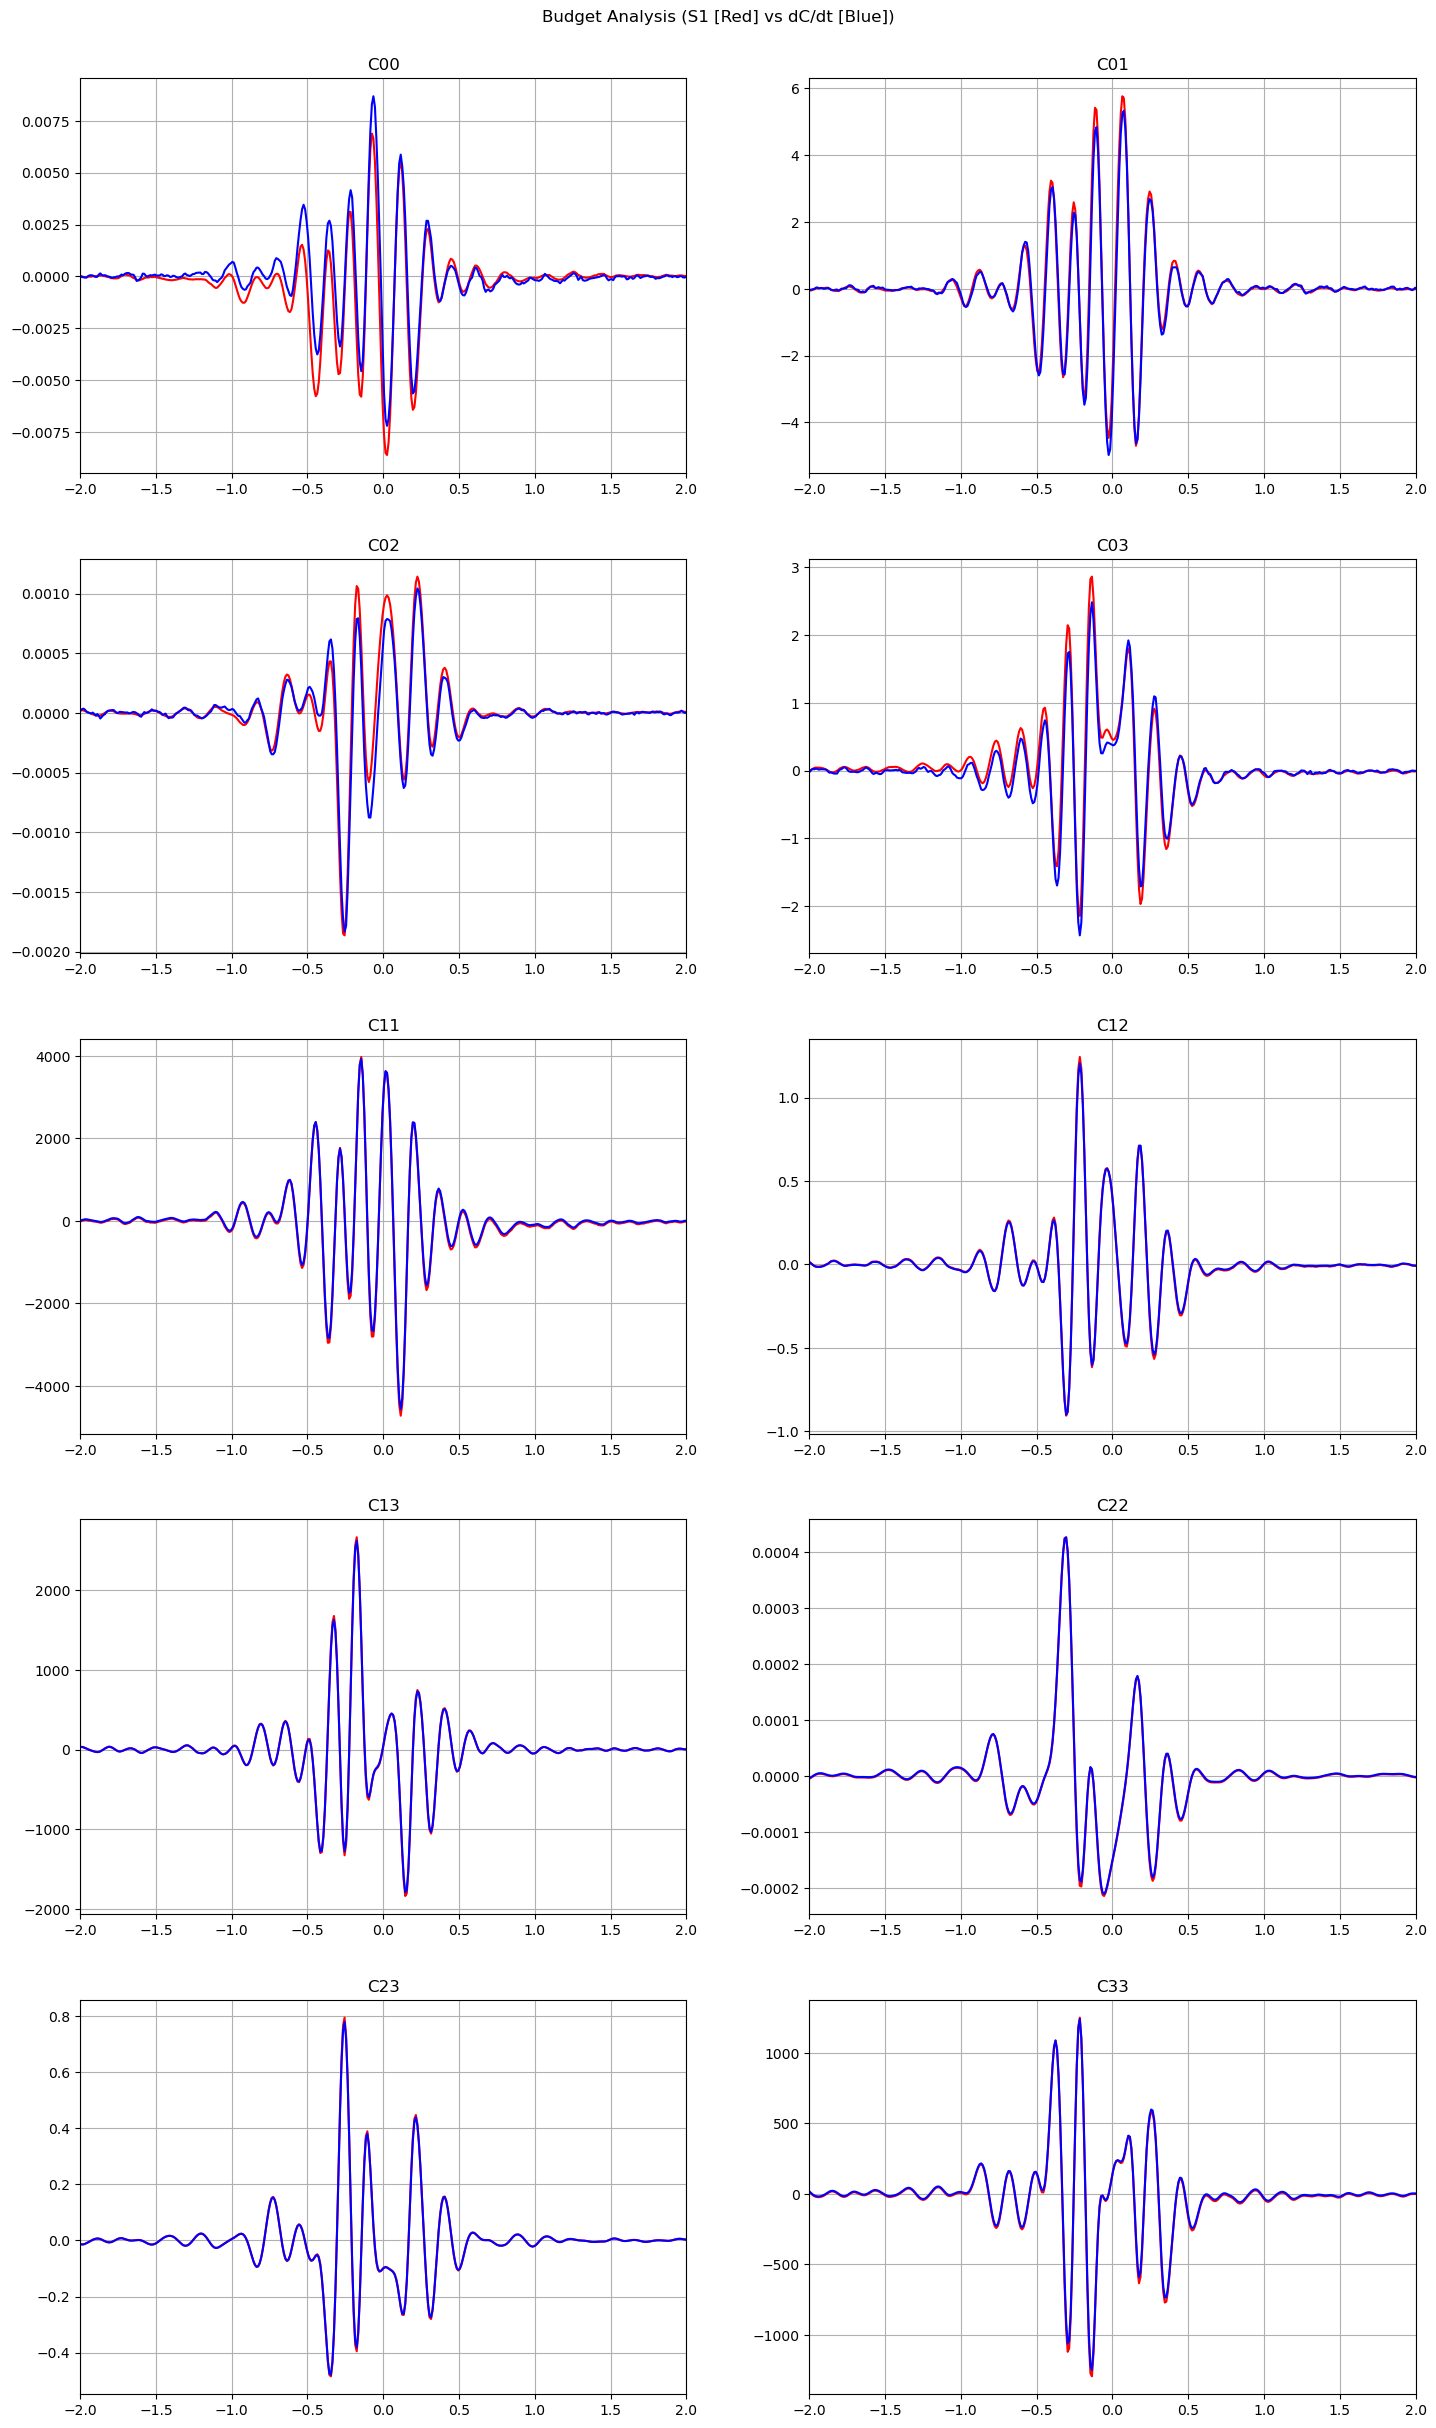

In [ ]:
time_array = np.linspace(-5, 5, int(10/.01))
# time_array = np.arange(2000/10, 2000/10) * dt * 10
#fig, axs = plt.subplots(1,1, figsize = (8, 12))
x_limit = (-2, 2)

fig, axs = plt.subplots(5, 2, figsize=(15, 25))


axs[0, 0].plot(time_array, s1[:, 0, 0],'r')
axs[0, 0].plot(time_array, dC_dt[:, 0, 0],'b')
axs[0, 0].set_title(f'C00')
axs[0, 0].set_xlim(x_limit)
axs[0, 0].grid()

axs[0, 1].plot(time_array, s1[:, 0, 1],'r')
axs[0, 1].plot(time_array, dC_dt[:, 0, 1],'b')
axs[0, 1].set_title(f'C01')
axs[0, 1].set_xlim(x_limit)
axs[0, 1].grid()

axs[1, 0].plot(time_array, s1[:, 0, 2],'r')
axs[1, 0].plot(time_array, dC_dt[:, 0, 2],'b')
axs[1, 0].set_title(f'C02')
axs[1, 0].set_xlim(x_limit)
axs[1, 0].grid()

axs[1, 1].plot(time_array, s1[:, 0, 3],'r')
axs[1, 1].plot(time_array, dC_dt[:, 0, 3],'b')
axs[1, 1].set_title(f'C03')
axs[1, 1].set_xlim(x_limit)
axs[1, 1].grid()

axs[2, 0].plot(time_array, s1[:, 1, 1],'r')
axs[2, 0].plot(time_array, dC_dt[:, 1, 1],'b')
axs[2, 0].set_title(f'C11')
axs[2, 0].set_xlim(x_limit)
axs[2, 0].grid()

axs[2, 1].plot(time_array, s1[:, 1, 2],'r')
axs[2, 1].plot(time_array, dC_dt[:, 1, 2],'b')
axs[2, 1].set_title(f'C12')
axs[2, 1].set_xlim(x_limit)
axs[2, 1].grid()

axs[3, 0].plot(time_array, s1[:, 1, 3],'r')
axs[3, 0].plot(time_array, dC_dt[:, 1, 3],'b')
axs[3, 0].set_title(f'C13')
axs[3, 0].set_xlim(x_limit)
axs[3, 0].grid()

axs[3, 1].plot(time_array, s1[:, 2, 2],'r')
axs[3, 1].plot(time_array, dC_dt[:, 2, 2],'b')
axs[3, 1].set_title(f'C22')
axs[3, 1].set_xlim(x_limit)
axs[3, 1].grid()

axs[4, 0].plot(time_array, s1[:, 2, 3],'r')
axs[4, 0].plot(time_array, dC_dt[:, 2, 3],'b')
axs[4, 0].set_title(f'C23')
axs[4, 0].set_xlim(x_limit)
axs[4, 0].grid()

axs[4, 1].plot(time_array, s1[:, 3, 3],'r')
axs[4, 1].plot(time_array, dC_dt[:, 3, 3],'b')
axs[4, 1].set_title(f'C33')
axs[4, 1].set_xlim(x_limit)
axs[4, 1].grid()


plt.suptitle(f"Budget Analysis (S1 [Red] vs dC/dt [Blue])")



#plt.subplots_adjust(wspace=.4)
#plt.subplots_adjust(hspace=.4)
plt.tight_layout(pad = 3)
plt.show()

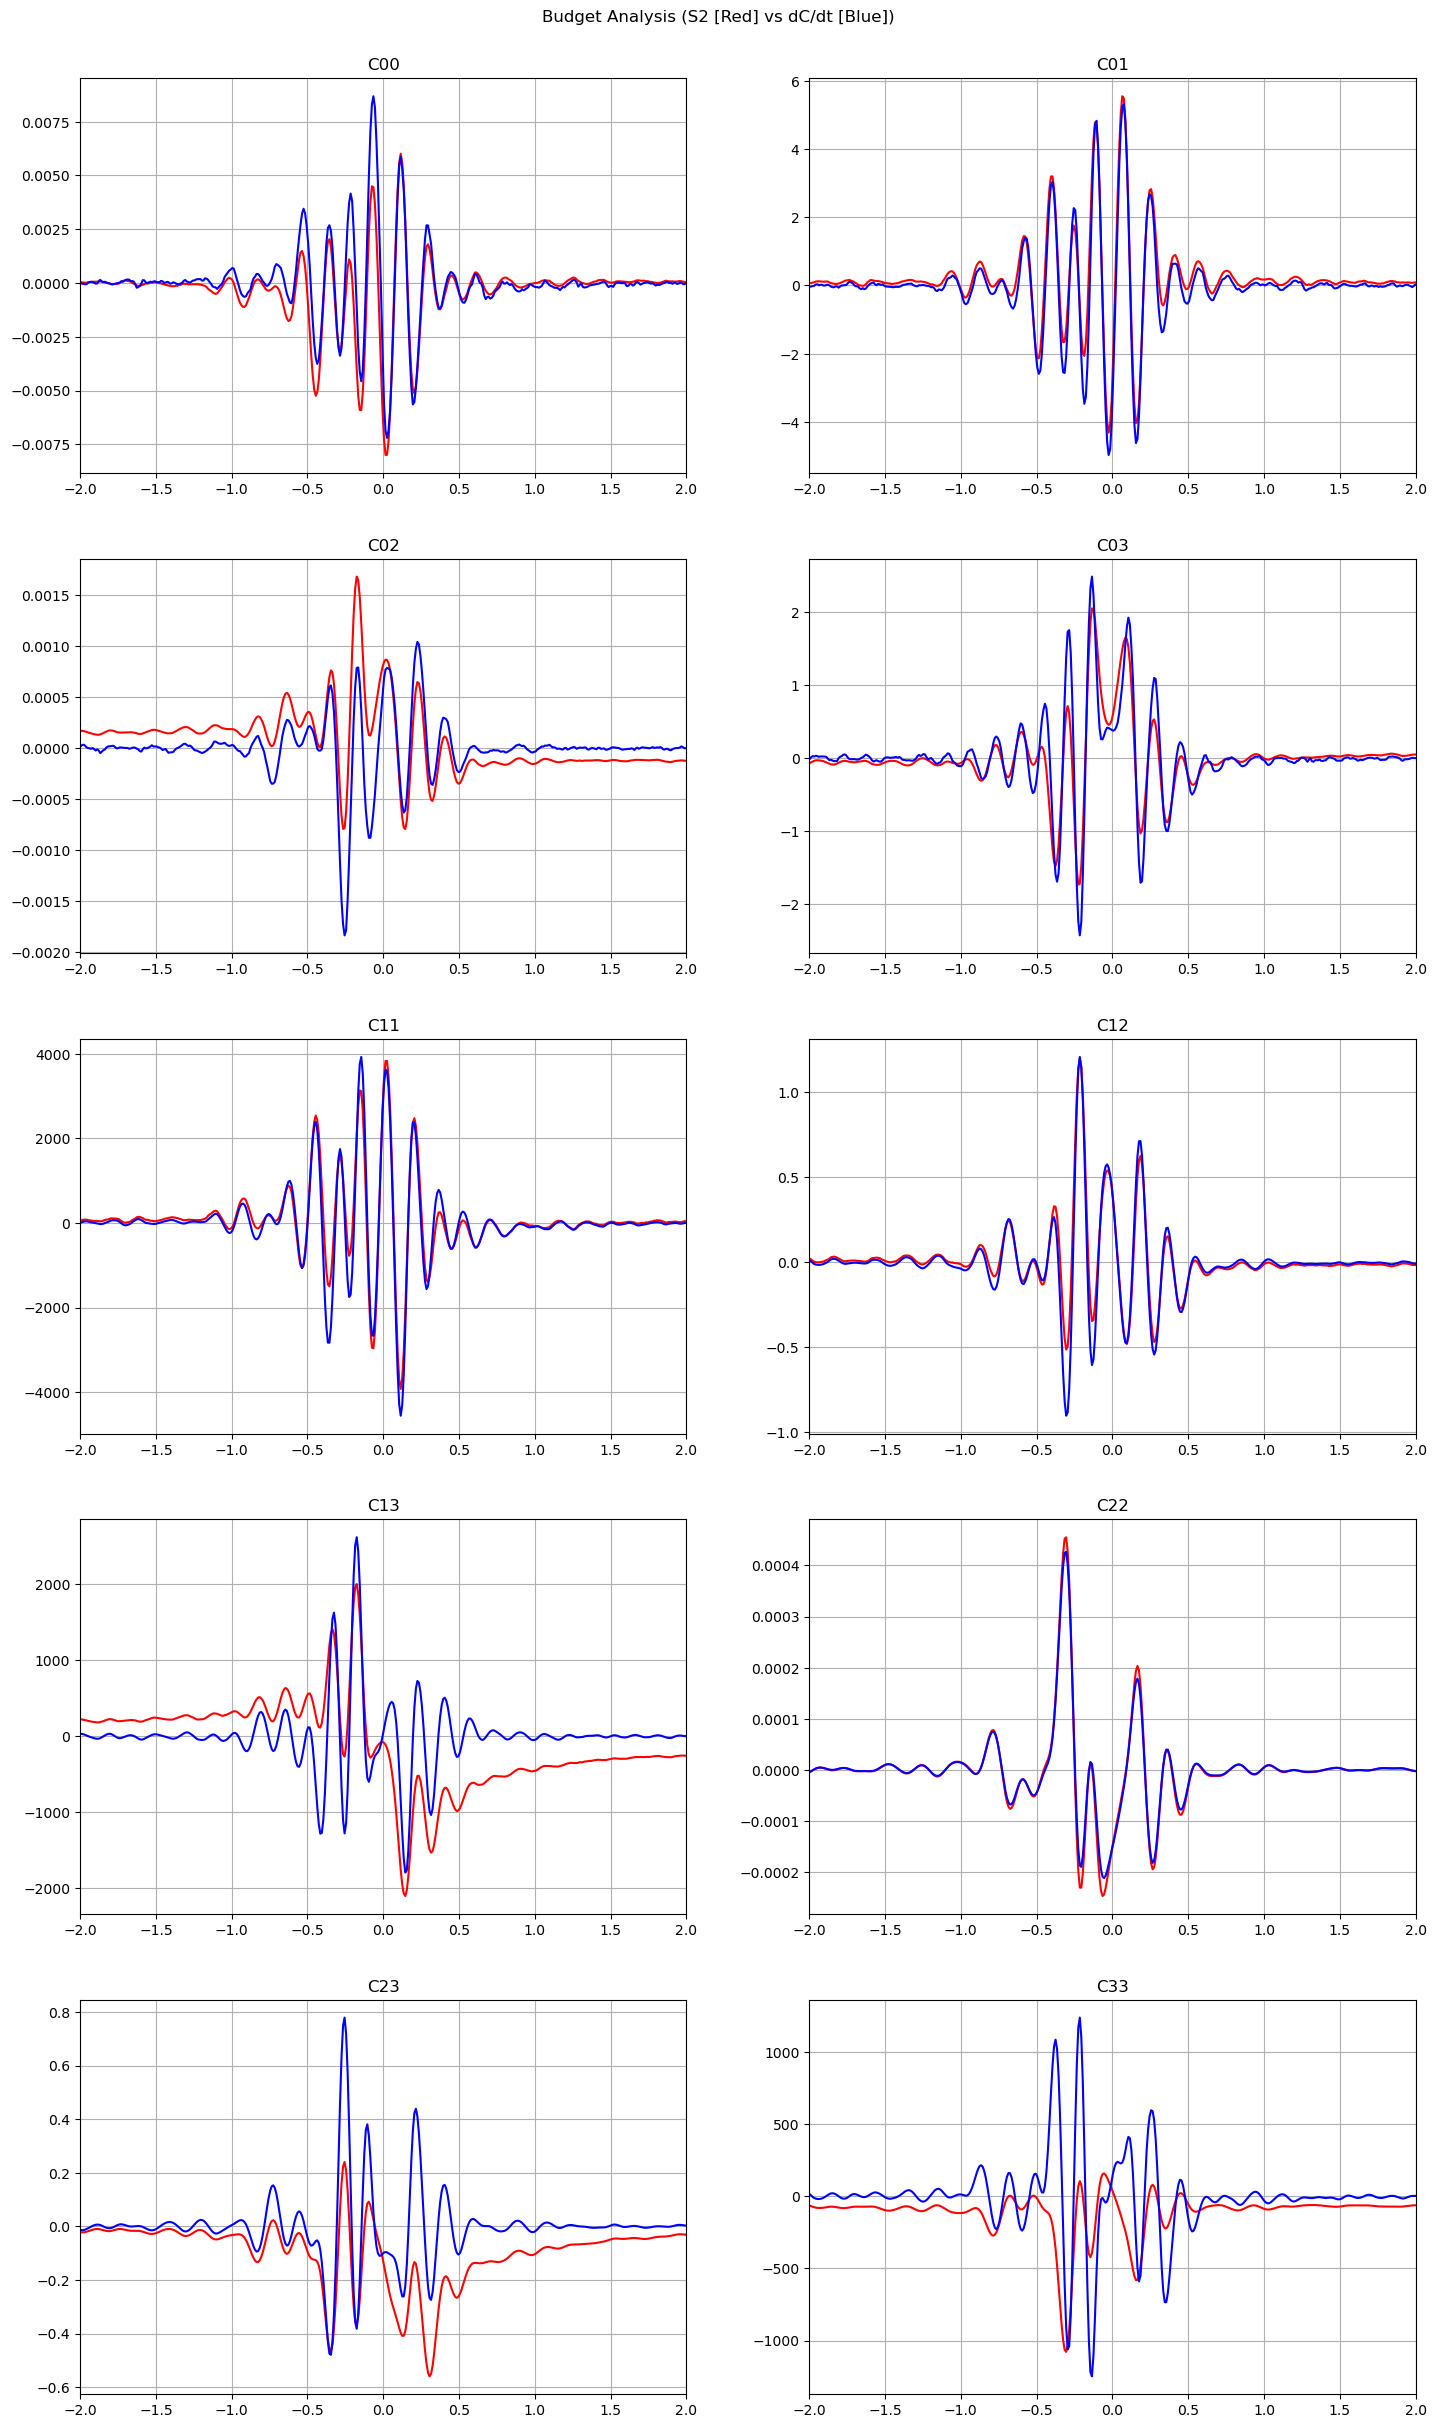

In [ ]:
time_array = np.linspace(-5, 5, int(10/.01))
# time_array = np.arange(2000/10, 2000/10) * dt * 10
#fig, axs = plt.subplots(1,1, figsize = (8, 12))
x_limit = (-2, 2)

fig, axs = plt.subplots(5, 2, figsize=(15, 25))


axs[0, 0].plot(time_array, s2[:, 0, 0],'r')
axs[0, 0].plot(time_array, dC_dt[:, 0, 0],'b')
axs[0, 0].set_title(f'C00')
axs[0, 0].set_xlim(x_limit)
axs[0, 0].grid()

axs[0, 1].plot(time_array, s2[:, 0, 1],'r')
axs[0, 1].plot(time_array, dC_dt[:, 0, 1],'b')
axs[0, 1].set_title(f'C01')
axs[0, 1].set_xlim(x_limit)
axs[0, 1].grid()

axs[1, 0].plot(time_array, s2[:, 0, 2],'r')
axs[1, 0].plot(time_array, dC_dt[:, 0, 2],'b')
axs[1, 0].set_title(f'C02')
axs[1, 0].set_xlim(x_limit)
axs[1, 0].grid()

axs[1, 1].plot(time_array, s2[:, 0, 3],'r')
axs[1, 1].plot(time_array, dC_dt[:, 0, 3],'b')
axs[1, 1].set_title(f'C03')
axs[1, 1].set_xlim(x_limit)
axs[1, 1].grid()

axs[2, 0].plot(time_array, s2[:, 1, 1],'r')
axs[2, 0].plot(time_array, dC_dt[:, 1, 1],'b')
axs[2, 0].set_title(f'C11')
axs[2, 0].set_xlim(x_limit)
axs[2, 0].grid()

axs[2, 1].plot(time_array, s2[:, 1, 2],'r')
axs[2, 1].plot(time_array, dC_dt[:, 1, 2],'b')
axs[2, 1].set_title(f'C12')
axs[2, 1].set_xlim(x_limit)
axs[2, 1].grid()

axs[3, 0].plot(time_array, s2[:, 1, 3],'r')
axs[3, 0].plot(time_array, dC_dt[:, 1, 3],'b')
axs[3, 0].set_title(f'C13')
axs[3, 0].set_xlim(x_limit)
axs[3, 0].grid()

axs[3, 1].plot(time_array, s2[:, 2, 2],'r')
axs[3, 1].plot(time_array, dC_dt[:, 2, 2],'b')
axs[3, 1].set_title(f'C22')
axs[3, 1].set_xlim(x_limit)
axs[3, 1].grid()

axs[4, 0].plot(time_array, s2[:, 2, 3],'r')
axs[4, 0].plot(time_array, dC_dt[:, 2, 3],'b')
axs[4, 0].set_title(f'C23')
axs[4, 0].set_xlim(x_limit)
axs[4, 0].grid()

axs[4, 1].plot(time_array, s2[:, 3, 3],'r')
axs[4, 1].plot(time_array, dC_dt[:, 3, 3],'b')
axs[4, 1].set_title(f'C33')
axs[4, 1].set_xlim(x_limit)
axs[4, 1].grid()


plt.suptitle(f"Budget Analysis (S2 [Red] vs dC/dt [Blue])")



#plt.subplots_adjust(wspace=.4)
#plt.subplots_adjust(hspace=.4)
plt.tight_layout(pad = 3)
plt.show()

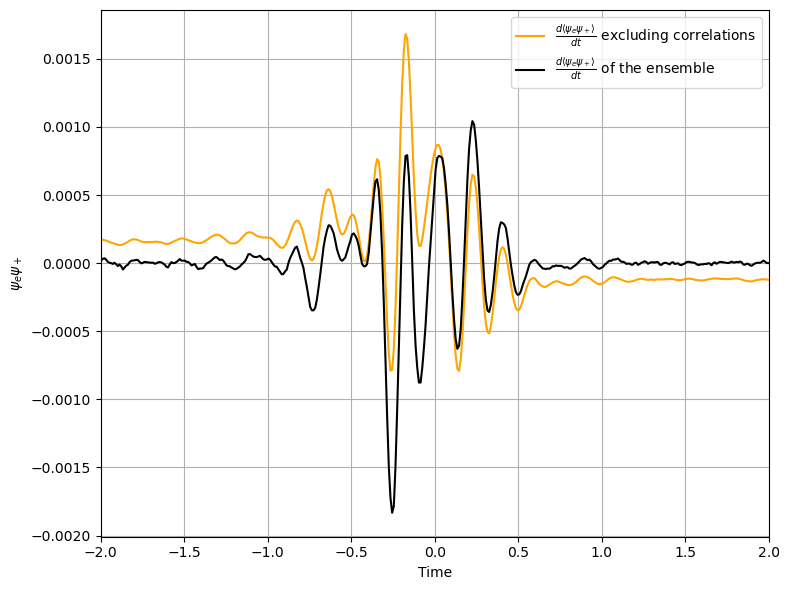

In [ ]:
time_array = np.linspace(-5, 5, int(10/.01))
x_limit = (-2, 2)

fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# Plotting with LaTeX legend labels
axs.plot(time_array, s2[:, 0, 2], 'orange', label=r'$\frac{d\langle \psi_e \psi_+ \rangle}{dt}$ excluding correlations')
axs.plot(time_array, dC_dt[:, 0, 2], 'black', label=r'$\frac{d\langle \psi_e \psi_+ \rangle}{dt}$ of the ensemble')

axs.set_xlabel('Time')
axs.set_ylabel(r'$\psi_e \psi_+$')
axs.set_xlim(x_limit)
axs.grid()

# Add the legend
axs.legend()

plt.tight_layout()
plt.show()

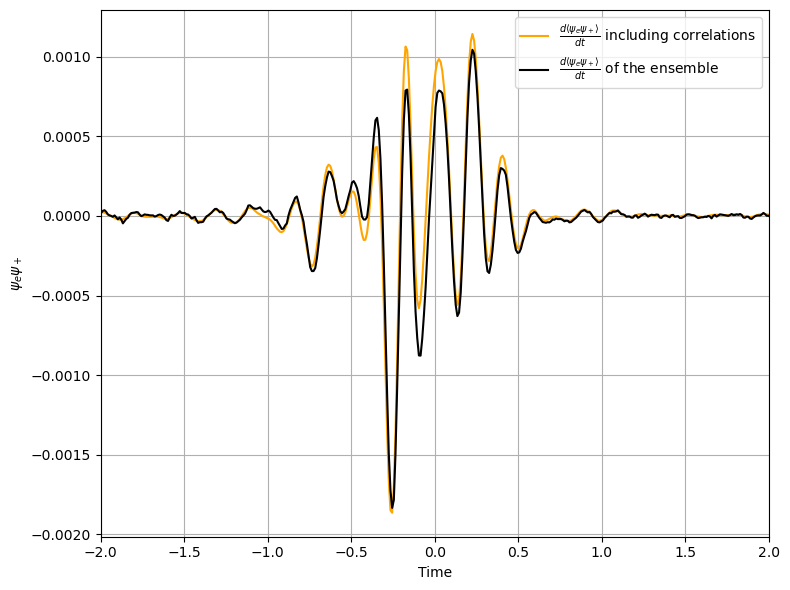

In [ ]:
time_array = np.linspace(-5, 5, int(10/.01))
x_limit = (-2, 2)

fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# Plotting with LaTeX legend labels
axs.plot(time_array, s1[:, 0, 2], 'orange', label=r'$\frac{d\langle \psi_e \psi_+ \rangle}{dt}$ including correlations')
axs.plot(time_array, dC_dt[:, 0, 2], 'black', label=r'$\frac{d\langle \psi_e \psi_+ \rangle}{dt}$ of the ensemble')

axs.set_xlabel('Time')
axs.set_ylabel(r'$\psi_e \psi_+$')
axs.set_xlim(x_limit)
axs.grid()

# Add the legend
axs.legend()

plt.tight_layout()
plt.show()

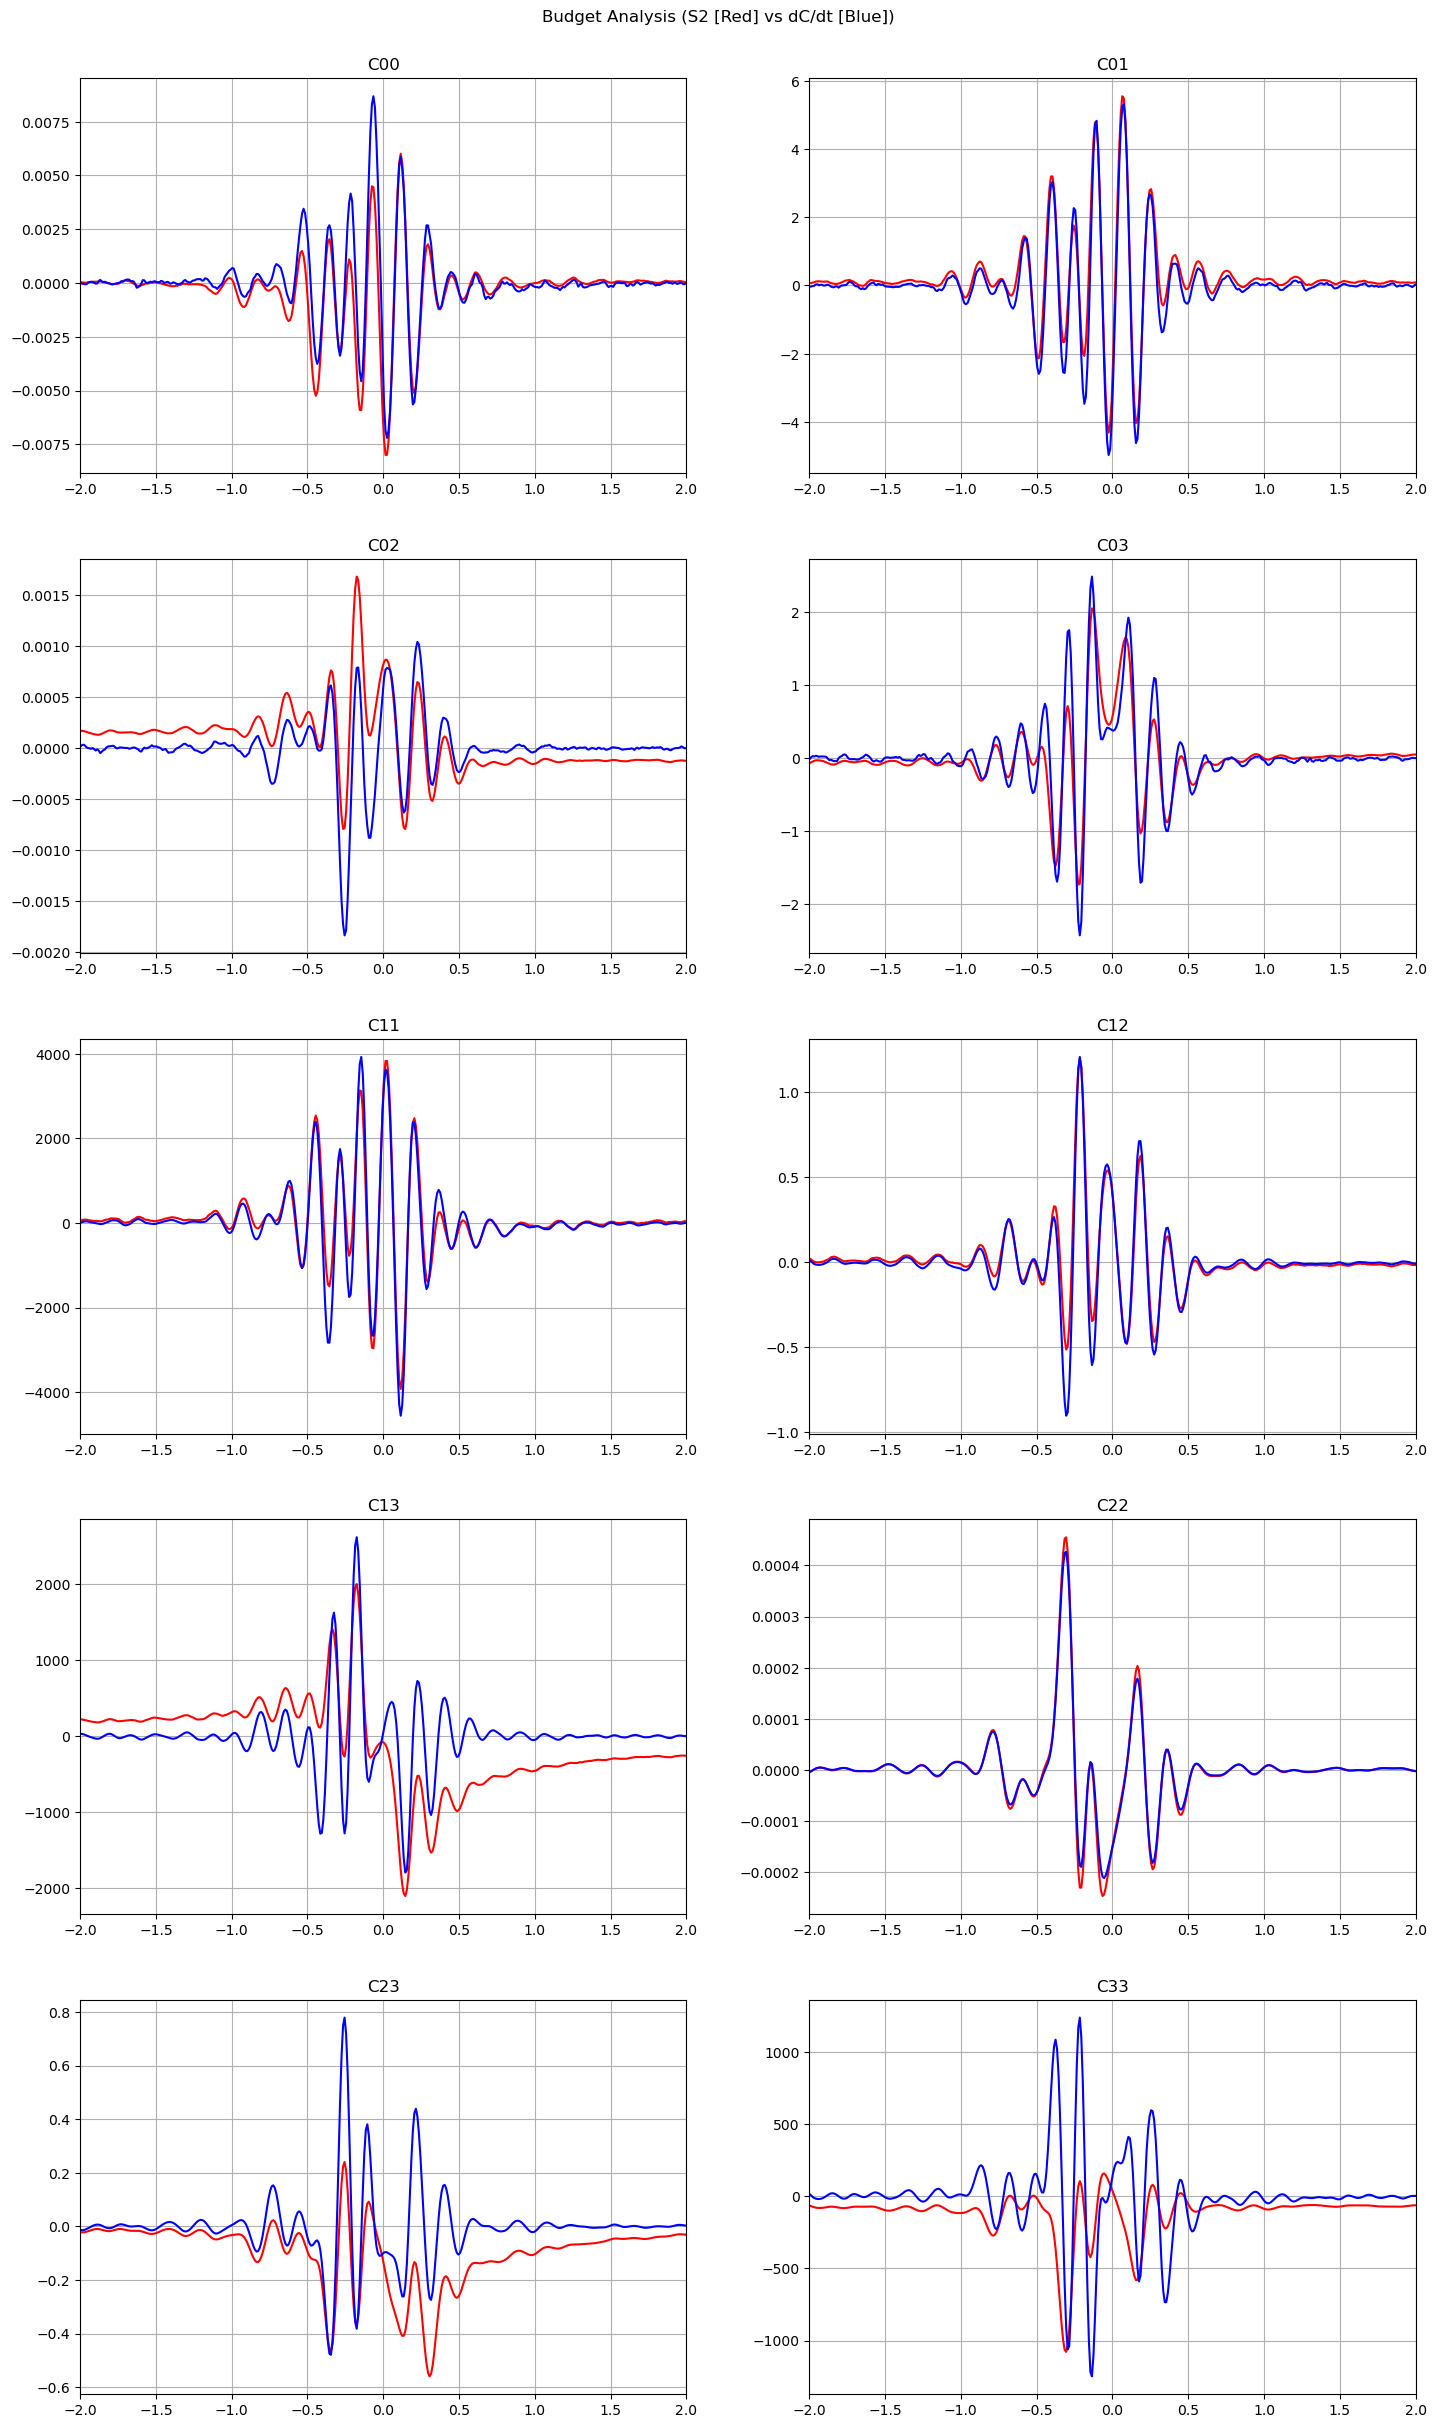

In [ ]:
time_array = np.linspace(-5, 5, int(10/.01))
# time_array = np.arange(2000/10, 2000/10) * dt * 10
#fig, axs = plt.subplots(1,1, figsize = (8, 12))
x_limit = (-2, 2)

fig, axs = plt.subplots(5, 2, figsize=(15, 25))


axs[0, 0].plot(time_array, s2[:, 0, 0],'r')
axs[0, 0].plot(time_array, dC_dt[:, 0, 0],'b')
axs[0, 0].set_title(f'C00')
axs[0, 0].set_xlim(x_limit)
axs[0, 0].grid()

axs[0, 1].plot(time_array, s2[:, 0, 1],'r')
axs[0, 1].plot(time_array, dC_dt[:, 0, 1],'b')
axs[0, 1].set_title(f'C01')
axs[0, 1].set_xlim(x_limit)
axs[0, 1].grid()

axs[1, 0].plot(time_array, s2[:, 0, 2],'r')
axs[1, 0].plot(time_array, dC_dt[:, 0, 2],'b')
axs[1, 0].set_title(f'C02')
axs[1, 0].set_xlim(x_limit)
axs[1, 0].grid()

axs[1, 1].plot(time_array, s2[:, 0, 3],'r')
axs[1, 1].plot(time_array, dC_dt[:, 0, 3],'b')
axs[1, 1].set_title(f'C03')
axs[1, 1].set_xlim(x_limit)
axs[1, 1].grid()

axs[2, 0].plot(time_array, s2[:, 1, 1],'r')
axs[2, 0].plot(time_array, dC_dt[:, 1, 1],'b')
axs[2, 0].set_title(f'C11')
axs[2, 0].set_xlim(x_limit)
axs[2, 0].grid()

axs[2, 1].plot(time_array, s2[:, 1, 2],'r')
axs[2, 1].plot(time_array, dC_dt[:, 1, 2],'b')
axs[2, 1].set_title(f'C12')
axs[2, 1].set_xlim(x_limit)
axs[2, 1].grid()

axs[3, 0].plot(time_array, s2[:, 1, 3],'r')
axs[3, 0].plot(time_array, dC_dt[:, 1, 3],'b')
axs[3, 0].set_title(f'C13')
axs[3, 0].set_xlim(x_limit)
axs[3, 0].grid()

axs[3, 1].plot(time_array, s2[:, 2, 2],'r')
axs[3, 1].plot(time_array, dC_dt[:, 2, 2],'b')
axs[3, 1].set_title(f'C22')
axs[3, 1].set_xlim(x_limit)
axs[3, 1].grid()

axs[4, 0].plot(time_array, s2[:, 2, 3],'r')
axs[4, 0].plot(time_array, dC_dt[:, 2, 3],'b')
axs[4, 0].set_title(f'C23')
axs[4, 0].set_xlim(x_limit)
axs[4, 0].grid()

axs[4, 1].plot(time_array, s2[:, 3, 3],'r')
axs[4, 1].plot(time_array, dC_dt[:, 3, 3],'b')
axs[4, 1].set_title(f'C33')
axs[4, 1].set_xlim(x_limit)
axs[4, 1].grid()


plt.suptitle(f"Budget Analysis (S2 [Red] vs dC/dt [Blue])")



#plt.subplots_adjust(wspace=.4)
#plt.subplots_adjust(hspace=.4)
plt.tight_layout(pad = 3)
plt.show()

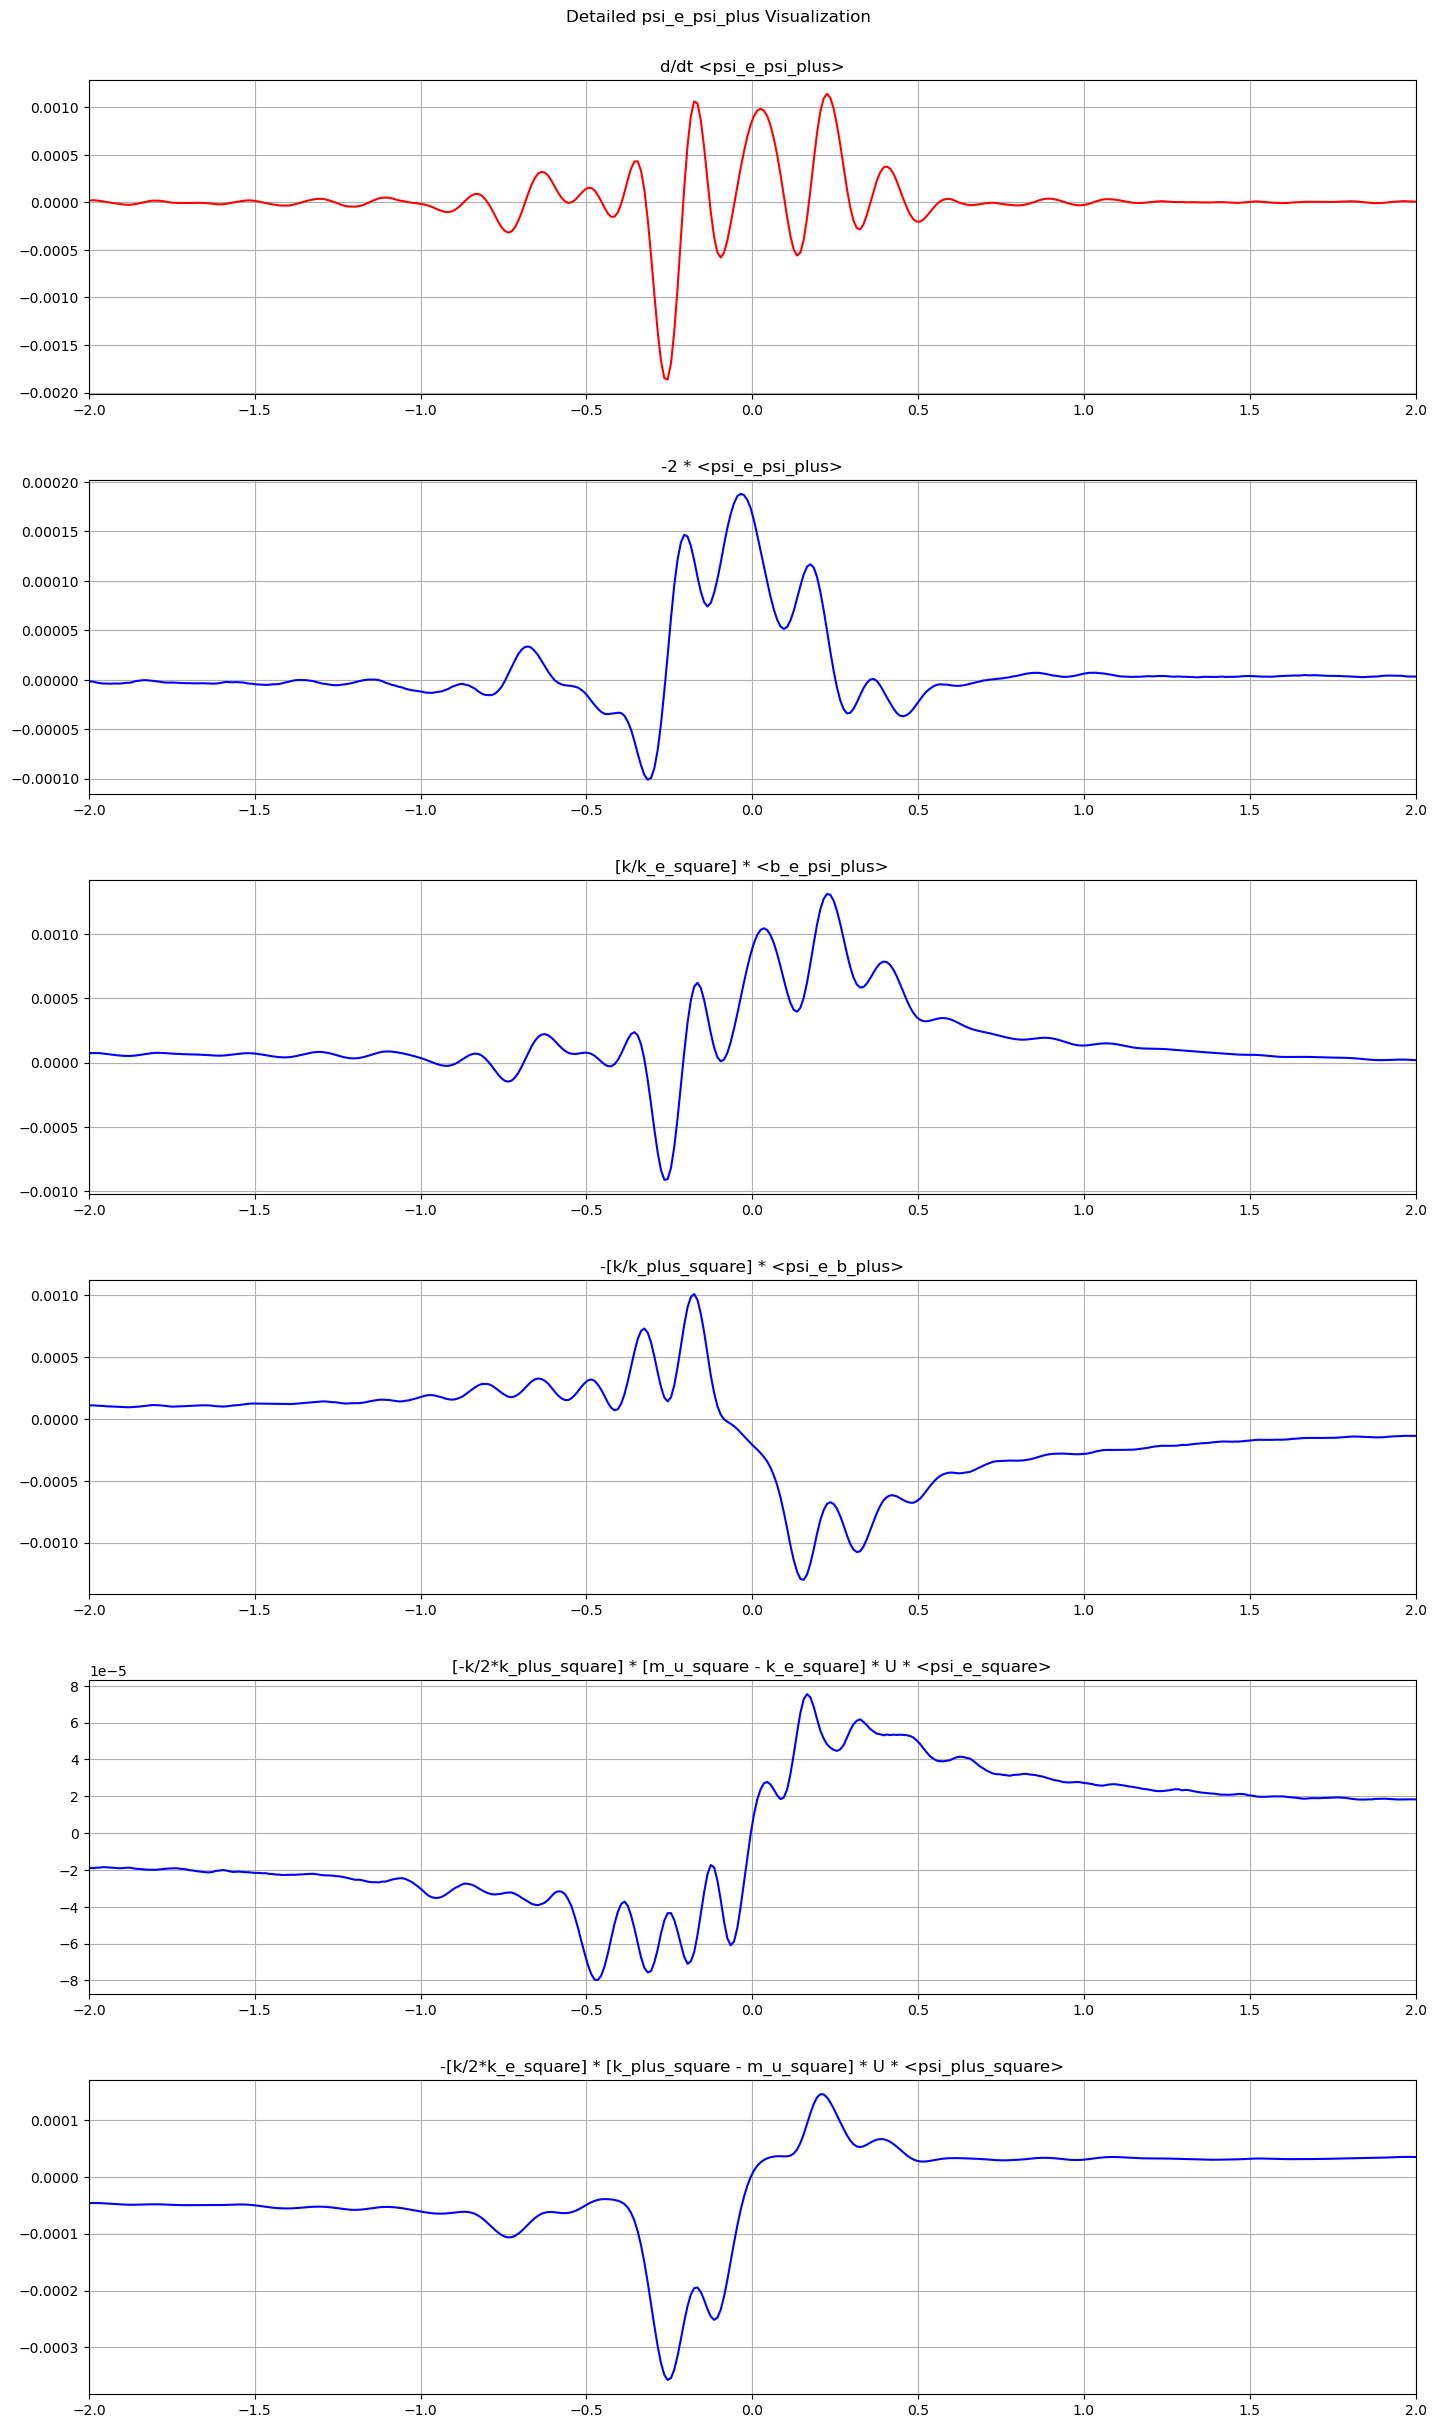

In [ ]:
time_array = np.linspace(-5, 5, int(10/.01))
# time_array = np.arange(2000/10, 2000/10) * dt * 10
#fig, axs = plt.subplots(1,1, figsize = (8, 12))
x_limit = (-2, 2)

fig, axs = plt.subplots(6, 1, figsize=(15, 25))


axs[0].plot(time_array, s1[:, 0, 2],'r')
axs[0].set_title(f'd/dt <psi_e_psi_plus>')
axs[0].set_xlim(x_limit)
axs[0].grid()

axs[1].plot(time_array, -2 * average_R/(0.25 * k * (k_plus_square - k_e_square)),'b')
axs[1].set_title(f'-2 * <psi_e_psi_plus>')
axs[1].set_xlim(x_limit)
axs[1].grid()

axs[2].plot(time_array, (k/k_e_square) * average_b_e_psi_plus_list,'b')
axs[2].set_title(f'[k/k_e_square] * <b_e_psi_plus>')
axs[2].set_xlim(x_limit)
axs[2].grid()

axs[3].plot(time_array, (-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list,'b')
axs[3].set_title(f'-[k/k_plus_square] * <psi_e_b_plus>')
axs[3].set_xlim(x_limit)
axs[3].grid()

axs[4].plot(time_array, (-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e),'b')
axs[4].set_title(f'[-k/2*k_plus_square] * [m_u_square - k_e_square] * U * <psi_e_square>')
axs[4].set_xlim(x_limit) 
axs[4].grid()

axs[5].plot(time_array, (-k/(2*k_plus_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus),'b')
axs[5].set_title(f'-[k/2*k_e_square] * [k_plus_square - m_u_square] * U * <psi_plus_square>')
axs[5].set_xlim(x_limit)
axs[5].grid()


plt.suptitle(f"Detailed psi_e_psi_plus Visualization")



#plt.subplots_adjust(wspace=.4)
#plt.subplots_adjust(hspace=.4)
plt.tight_layout(pad = 3)
plt.show()

In [ ]:
# time_array = np.linspace(-5, 5, int(10/.01))
# # time_array = np.arange(2000/10, 2000/10) * dt * 10
# #fig, axs = plt.subplots(1,1, figsize = (8, 12))
# x_limit = (-2, 2)

# fig, axs = plt.subplots(1, 1, figsize=(12, 8))

# sumOfIndividualItems = (-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))) + ((k/k_e_square) * average_b_e_psi_plus_list) + ((-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list) + ((-k/(2*k_plus_square) * (np.square(m_u) - k_e_square) * average_UK_e_psi_e)) + ((-k/(2*k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus))

# # sumOfIndividualItems = (-2 * average_R/(0.25 * k *fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# labels = [
#     'dC/dt[:, 0, 2]',
#     'sumOfIndividualItems',
#     '-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))',
#     '(k/k_e_square) * average_b_e_psi_plus_list',
#     '(-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list',
#     '(-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e)',
#     '(-k/(2*k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus'
# ]

# sumOfIndividualItems = ((k / k_e_square) * average_b_e_psi_plus_list) + \
#                        ((-k / (2 * k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus))
#                         # ((-k / (2 * k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus))

# # ax.plot(time_array, dC_dt[:, 0, 2], '--r',label=labels[0], lw = 3)
# ax.plot(time_array, sumOfIndividualItems,'-k',label=labels[1], lw = 5)
# # ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)), label=labels[2])
# # # ax.plot(time_array, average_R/1000, '-b', lw = 3)
# # ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list, label=labels[3])
# # ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list, label=labels[4])
# # ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e), label=labels[5])
# # ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus), label=labels[6])


# ax.set_xlim(x_limit)

# ax.grid(True)
# ax.set_xlabel("Time")
# ax.set_ylabel("Values")

# ax.legend(loc='best')

# plt.suptitle(f"Detailed psi_e_psi_plus Visualization", fontsize=16)

# plt.tight_layout(pad=3)
# plt.show() 

# (k_plus_square - k_e_square))) + ((k/k_e_square) * average_b_e_psi_plus_list - ((k/k_e_square) * average_b_e_psi_plus_list[0])) + ((-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list - ((-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list[0])) + ((-k/(2*k_plus_square) * (np.square(m_u) - k_e_square) * average_UK_e_psi_e) - ((-k/(2*k_plus_square) * (np.square(m_u) - k_e_square) * average_UK_e_psi_e[0]))) - ((-k/(2*k_plus_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus) - ((-k/(2*k_plus_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus[0])))

# # axs.plot(time_array, dC_dt[:, 0, 2],'r')
# axs.plot(time_array, dC_dt[:, 0, 2], 'b')
# axs.plot(time_array, sumOfIndividualItems,'g')
# # axs.plot(time_array, s1[:, 0, 2])
# # axs.plot(time_array, -2 * average_R/(0.25 * k * (k_plus_square - k_e_square)))
# # axs.plot(time_array, (k/k_e_square) * average_b_e_psi_plus_list)
# # axs.plot(time_array, (-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list)
# # axs.plot(time_array, -(k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e))
# # axs.plot(time_array, -(k/(2*k_plus_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus))
# axs.set_xlim(x_limit)
# axs.grid()


# plt.suptitle(f"Detailed psi_e_psi_plus Visualization (Same plot)")



# #plt.subplots_adjust(wspace=.4)
# #plt.subplots_adjust(hspace=.4)
# plt.tight_layout(pad = 3)
# plt.show()

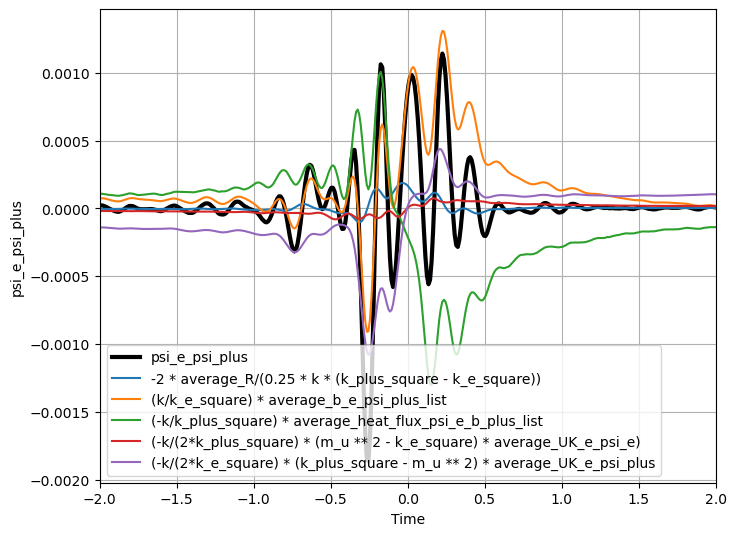

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

labels = [
    'dC/dt[:, 0, 2]',
    'psi_e_psi_plus',
    '-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))',
    '(k/k_e_square) * average_b_e_psi_plus_list',
    '(-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list',
    '(-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e)',
    '(-k/(2*k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus'
]

sumOfIndividualItems = (-2 * average_R / (0.25 * k * (k_plus_square - k_e_square))) + \
                       ((k / k_e_square) * average_b_e_psi_plus_list) + \
                       ((-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list) + \
                       ((-k / (2 * k_plus_square) * (np.square(m_u) - k_e_square) * average_UK_e_psi_e)) + \
                       ((-k / (2 * k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus))

# ax.plot(time_array, dC_dt[:, 0, 2], '--r',label=labels[0], lw = 3)
ax.plot(time_array, sumOfIndividualItems,'-k',label=labels[1], lw = 3)
ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)), label=labels[2])
# ax.plot(time_array, average_R/1000, '-b', lw = 3)
ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list, label=labels[3])
ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list, label=labels[4])
ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e), label=labels[5])
ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus), label=labels[6])


ax.set_xlim(x_limit)
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("psi_e_psi_plus")

ax.legend(loc='best')

# plt.suptitle(f"Detailed psi_e_psi_plus Visualization", fontsize=16)

plt.tight_layout(pad=3)
plt.show()

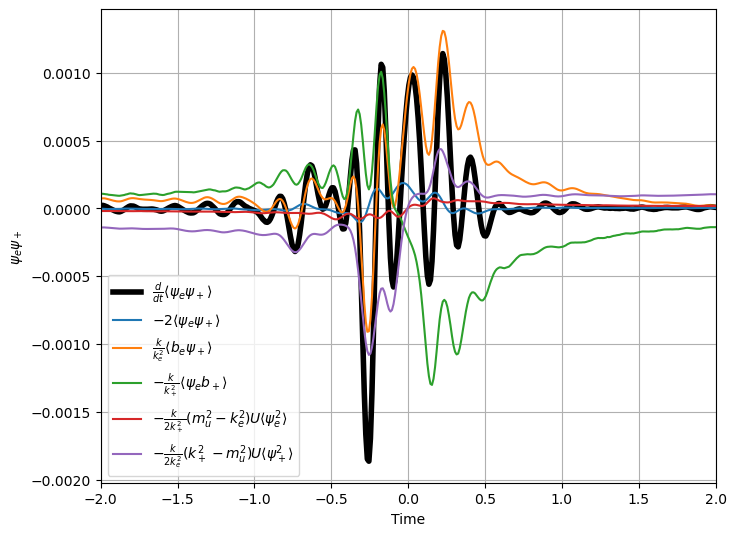

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot all terms with LaTeX-formatted labels
ax.plot(time_array, sumOfIndividualItems, '-k', lw=4, label=r"$\frac{d}{dt} \langle \psi_e \psi_+ \rangle$")
ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)),
        label=r"$-2 \langle \psi_e \psi_+ \rangle$")
ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list,
        label=r"$\frac{k}{k_e^2} \langle b_e \psi_+ \rangle$")
ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list,
        label=r"$-\frac{k}{k_+^2} \langle \psi_e b_+ \rangle$")
ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e),
        label=r"$-\frac{k}{2k_+^2} (m_u^2 - k_e^2) U \langle \psi_e^2 \rangle$")
ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus),
        label=r"$-\frac{k}{2k_e^2} (k_+^2 - m_u^2) U \langle \psi_+^2 \rangle$")

ax.set_xlim(x_limit)
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel(r"$\psi_e \psi_+$")

# Clean legend formatting
ax.legend(loc='best', fontsize=10)

plt.tight_layout(pad=3)
plt.show()


The green curve and the orange curve are responsible for the accleration of the jet near T = -0.4. These are also both heat fluxes. The terms driving the accleration is different from the ones causing the flip. 

### Pairwise Sum

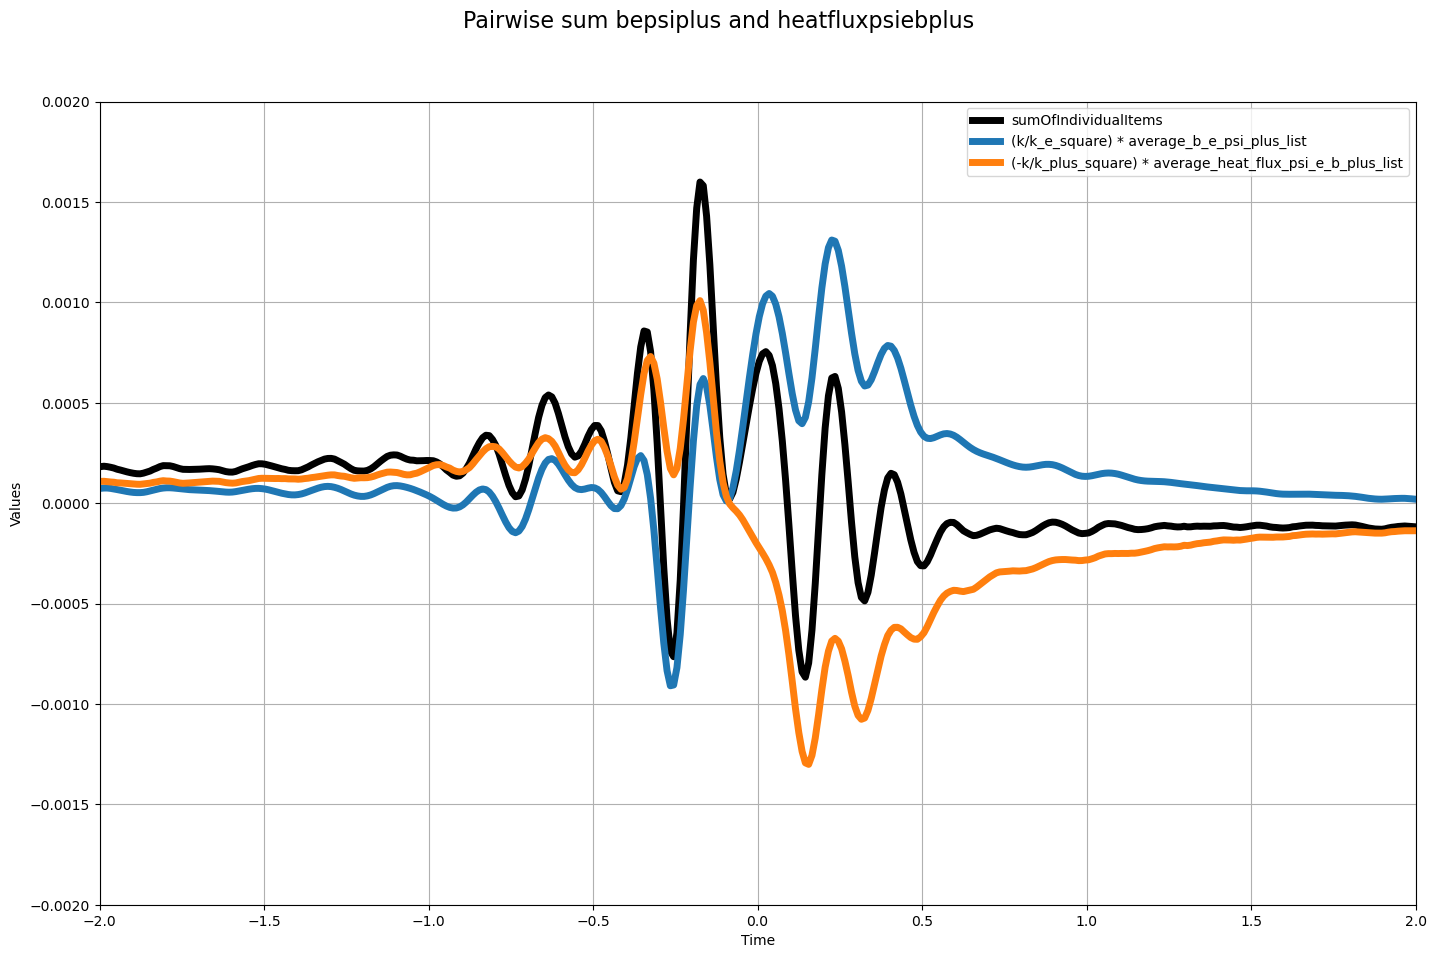

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

labels = [
    'dC/dt[:, 0, 2]',
    'sumOfIndividualItems',
    '-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))',
    '(k/k_e_square) * average_b_e_psi_plus_list',
    '(-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list',
    '(-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e)',
    '(-k/(2*k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus'
]

sumOfIndividualItems = ((k / k_e_square) * average_b_e_psi_plus_list) + \
                       ((-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list) 
                        # ((-k / (2 * k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus))

# ax.plot(time_array, dC_dt[:, 0, 2], '--r',label=labels[0], lw = 3)
ax.plot(time_array, sumOfIndividualItems,'-k',label=labels[1], lw = 5)
# ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)), label=labels[2])
# # ax.plot(time_array, average_R/1000, '-b', lw = 3)
ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list, label=labels[3], lw = 5)
ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list, label=labels[4], lw = 5)
# ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e), label=labels[5])
# ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus), label=labels[6])


ax.set_xlim(x_limit)
ax.set_ylim((-.002, .002))
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("Values")

ax.legend(loc='best')

plt.suptitle(f"Pairwise sum bepsiplus and heatfluxpsiebplus", fontsize=16)

plt.tight_layout(pad=3)
plt.show()

#Sum of the 2 heat flux termslambda_values_filled = np.nan_to_num(lambda_values_truncat

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

labels = [
    'dC/dt[:, 0, 2]',
    'sumOfIndividualItems',labels[2],
    '-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))',
    '(k/k_e_square) * average_b_e_psi_plus_list',
    '(-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list',
    '(-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e)',
    '(-k/(2*k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus'
]lambda_values_filled = np.nan_to_num(lambda_values_truncat * average_UK_e_psi_plus))

# ax.plot(time_array, dC_dt[:, 0, 2], '--r',label=labels[0], lw = 3)
ax.plot(time_array, sumOfIndividualItems,'-k',label=labels[1], lw = 5)
ax.plot(time_array, ((k / k_e_square) * average_b_e_psi_plus_list),label=labels[3], lw = 5)
ax.plot(time_array, (-k / (2 * k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus),label=labels[6], lw = 5)
# ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)), label=labels[2])
# # ax.plot(time_array, average_R/1000, '-b', lw = 3)
# ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list, label=labels[3])
# ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list, label=labels[4])
# ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e), label=labels[5])
# ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus), label=labels[6])


ax.set_xlim(x_limit)
ax.set_ylim((-.002, .002))
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("Values")
labels[2]
plt.show()

#Sum of the b_e_psi_plus + kinetic energy of exicted wave

SyntaxError: unmatched ')' (1711177651.py, line 11)

Reynold's Stress

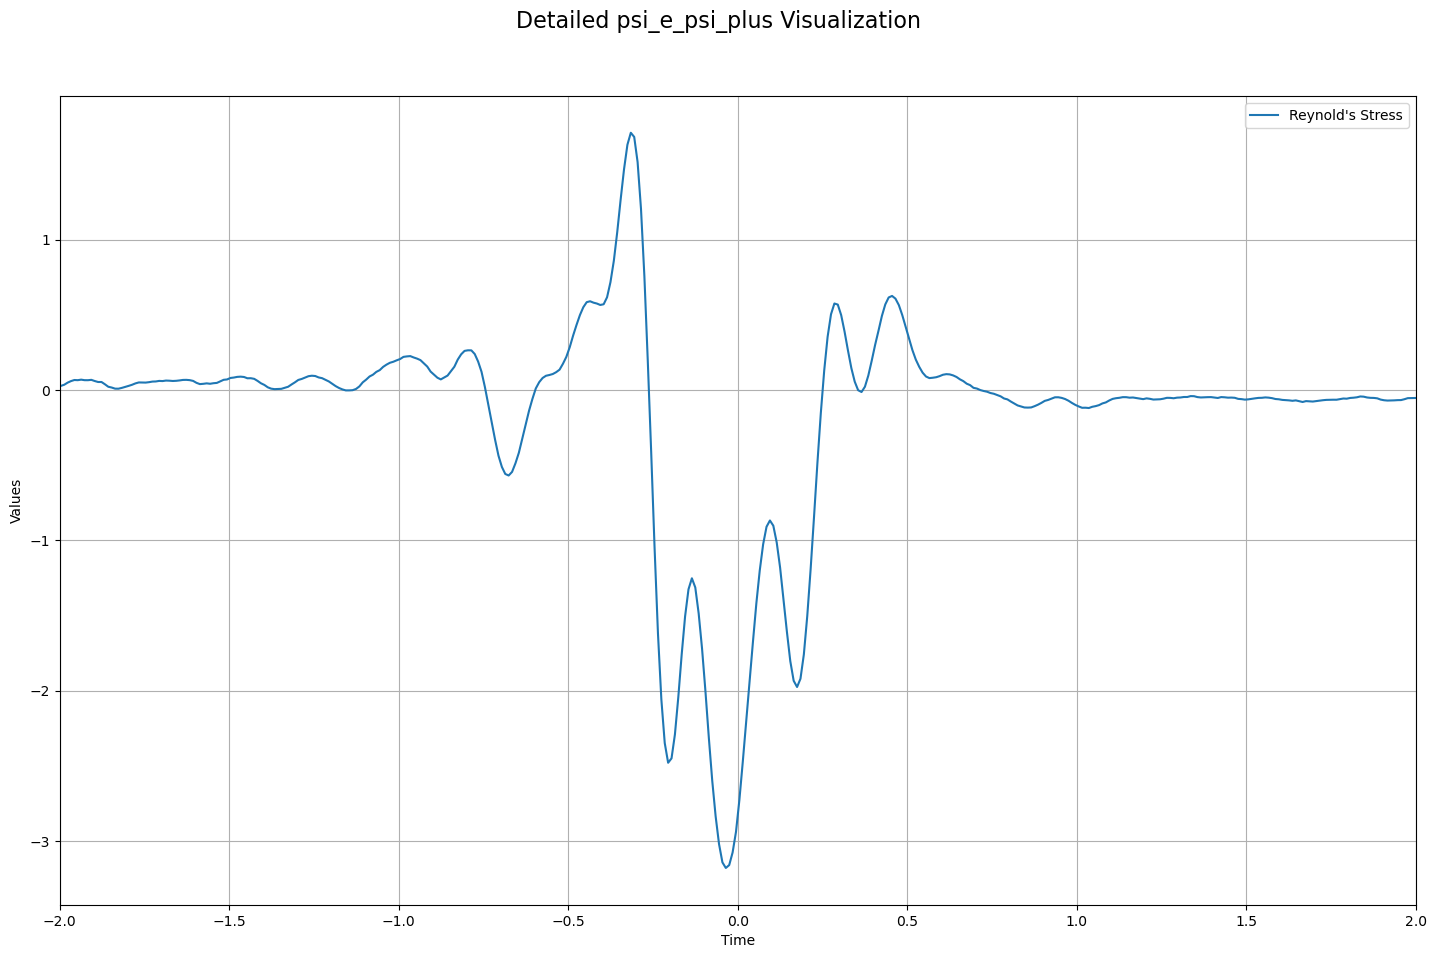

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

labels = [
    'dC/dt[:, 0, 2]',
    'sumOfIndividualItems',
    '-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))',
    '(k/k_e_square) * average_b_e_psi_plus_list',
    '(-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list',
    '(-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e)',
    '(-k/(2*k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus'
]
labels[2]
sumOfIndividualItems = (-2 * average_R / (0.25 * k * (k_plus_square - k_e_square))) + \
                       ((k / k_e_square) * average_b_e_psi_plus_list) + \
                       ((-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list) + \
                       ((-k / (2 * k_plus_square) * (np.square(m_u) - k_e_square) * average_UK_e_psi_e)) + \
                       ((-k / (2 * k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus))

# ax.plot(time_array, dC_dt[:, 0, 2], '--r',label=labels[0], lw = 3)
# ax.plot(time_array, sumOfIndividualItems,'-k',label=labels[1], lw = 5)
ax.plot(time_array, average_R , label="Reynold's Stress")
# ax.plot(time_array, average_R/1000, '-b', lw = 3)
# ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list, label=labels[3])
# ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list, label=labels[4])
# ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e), label=labels[5])
# ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus), label=labels[6])


ax.set_xlim(x_limit)
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("Values")

ax.legend(loc='best')

plt.suptitle(f"Detailed psi_e_psi_plus Visualization", fontsize=16)

plt.tight_layout(pad=3)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))lambda_values_filled = np.nan_to_num(lambda_values_truncat

labels = [
    'dC/dt[:, 0, 2]',
    'sumOfIndividualItems',
    '-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))',
    '(k/k_e_square) * average_b_e_psi_plus_list',
    '(-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list',
    '(-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e)',
    '(-k/(2*k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus'lambda_values_filled = np.nan_to_num(lambda_values_truncat
]

sumOfIndividualItems = -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus) + \
                       ((-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list)
                        # ((-k / (2 * k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus))

# ax.plot(time_array, dC_dt[:, 0, 2], '--r',label=labels[0], lw = 3)
ax.plot(time_array, sumOfIndividualItems,'-k',label=labels[1], lw = 5)
# ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)), label=labels[2])
# # ax.plot(time_array, average_R/1000, '-b', lw = 3)
# ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list, label=labels[3])
ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list, label=labels[4], lw = 5)
# ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e), label=labels[5])
ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus), label=labels[6], lw = 5)


ax.set_xlim(x_limit)
ax.set_ylim((-.002, .002))
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("Values")

ax.legend(loc='best')

plt.suptitle(f"Detailed psi_e_psi_plus Visualization", fontsize=16)

plt.tight_layout(pad=3)
plt.show()

#Sum of kepsi plus and psiebpluslambda_values_filled = np.nan_to_num(lambda_values_truncat

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' on line 10 (1411912571.py, line 11)

In [ ]:
C02 = average_C_matrix[:, 0, 2]
time_array = np.linspace(-5, 5, 1000)

spline = CubicSpline(time_array, C02)
# spline_derivative = spline.derivative()
# dc02 = spline_derivative(time_array)

time_fine = np.linspace(-5, 5, 10000)
C02_fine = spline(time_fine)
C02_derivative_fine = spline.derivative()(time_fine)
C02_derivative_fine = C02_derivative_fine[9::10]

In [ ]:
lambda_values_filled = np.nan_to_num(lambda_values_truncatx_limit = (-2, 2)

fig, axs = plt.subplots(1, 1, figsize=(12, 8))

sumOfIndividualItems = (-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))) + ((k/k_e_square) * average_b_e_psi_plus_list) + ((-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list) + ((-k/(2*k_plus_square) * (np.square(m_u) - k_e_square) * average_UK_e_psi_e)) + ((-k/(2*k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus))

# sumOfIndividualItems = (-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))) + ((k/k_e_square) * average_b_e_psi_plus_list - ((k/k_e_square) * average_b_e_psi_plus_list[0])) + ((-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list - ((-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list[0])) + ((-k/(2*k_plus_square) * (np.square(m_u) - k_e_square) * average_UK_e_psi_e) - ((-k/(2*k_plus_square) * (np.square(m_u) - k_e_square) * average_UK_e_psi_e[0]))) - ((-k/(2*k_plus_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus) - ((-k/(2*k_plus_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus[0])))

# axs.plot(time_array, dC_dt[:, 0, 2],'r')
axs.plot(time_array, C02_derivative_fine, 'b')
axs.plot(time_array, sumOfIndividualItems,'g')
# axs.plot(time_array, s1[:, 0, 2])
# axs.plot(time_array, -2 * average_R/(0.25 * k * (k_plus_square - k_e_square)))
# axs.plot(time_array, (k/k_e_square) * average_b_e_psi_plus_list)
# axs.plot(time_array, (-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list)
# axs.plot(time_array, -(k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e))
# axs.plot(time_array, -(k/(2*k_plus_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus))
axs.set_xlim(x_limit)
axs.grid()


plt.suptitle(f"Detailed psi_e_psi_plus Visualization (Same plot)")



#plt.subplots_adjust(wspace=.4)
#plt.subplots_adjust(hspace=.4)
plt.tight_layout(pad = 3)
plt.show()

SyntaxError: '(' was never closed (4100529952.py, line 1)

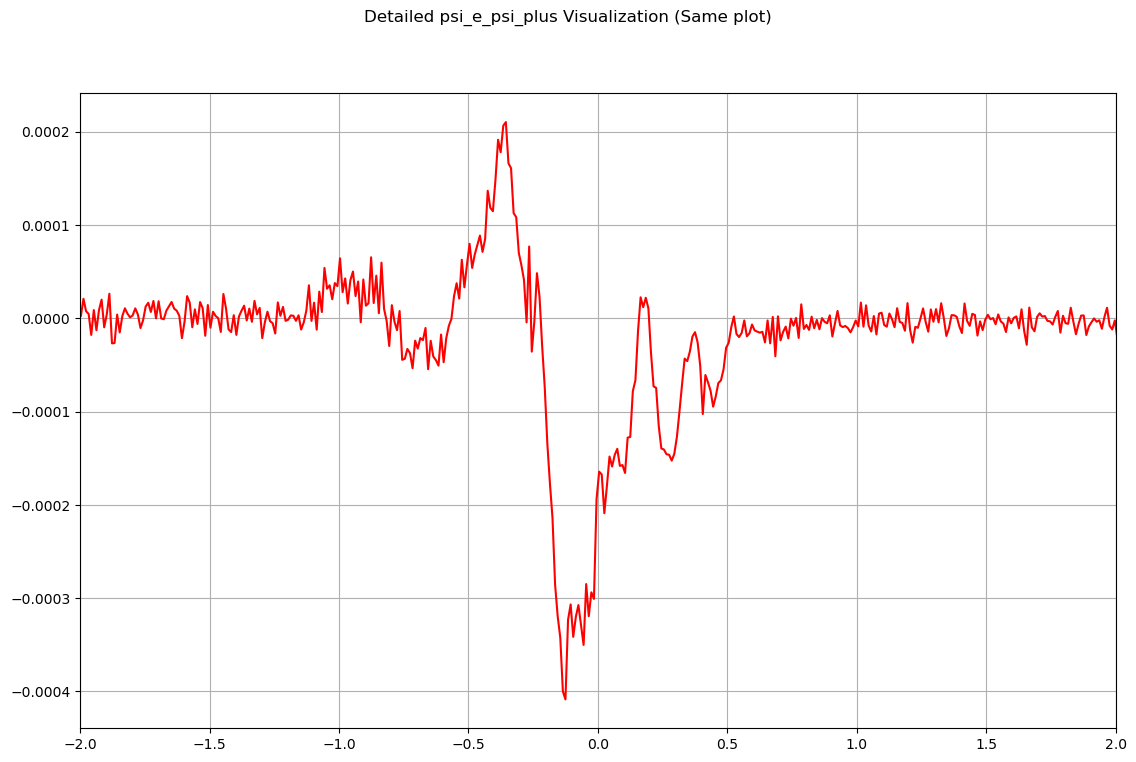

In [ ]:
x_limit = (-2, 2)

fig, axs = plt.subplots(1, 1, figsize=(12, 8))

axs.plot(time_array,  C02_derivative_fine - sumOfIndividualItems, 'r')
axs.set_xlim(x_limit)
axs.grid()


plt.suptitle(f"Detailed psi_e_psi_plus Visualization (Same plot)")
plt.tight_layout(pad = 3)
plt.show()


In [ ]:
s1 = average_WC + average_WC_Transpose + average_ULC + average_UCLT + epsilon*bigQ
# s1 *= 100

In [ ]:
average_C_matrix = np.array(average_C_Matrix)

delta_t = .001  

dC_dt = np.zeros_like(average_C_matrix)

dC_dt[0] = (average_C_matrix[1] - average_C_matrix[0]) / delta_tlambda_values_filled = np.nan_to_num(lambda_values_truncat

for i in range(1, len(average_C_matrix) - 1):
    dC_dt[i] = (average_C_matrix[i + 1] - average_C_matrix[i - 1]) / (2 * delta_t)

dC_dt[-1] = (average_C_matrix[-1] - average_C_matrix[-2]) / delta_t
dC_dt = dC_dt/10

SyntaxError: cannot assign to expression (2816279055.py, line 7)

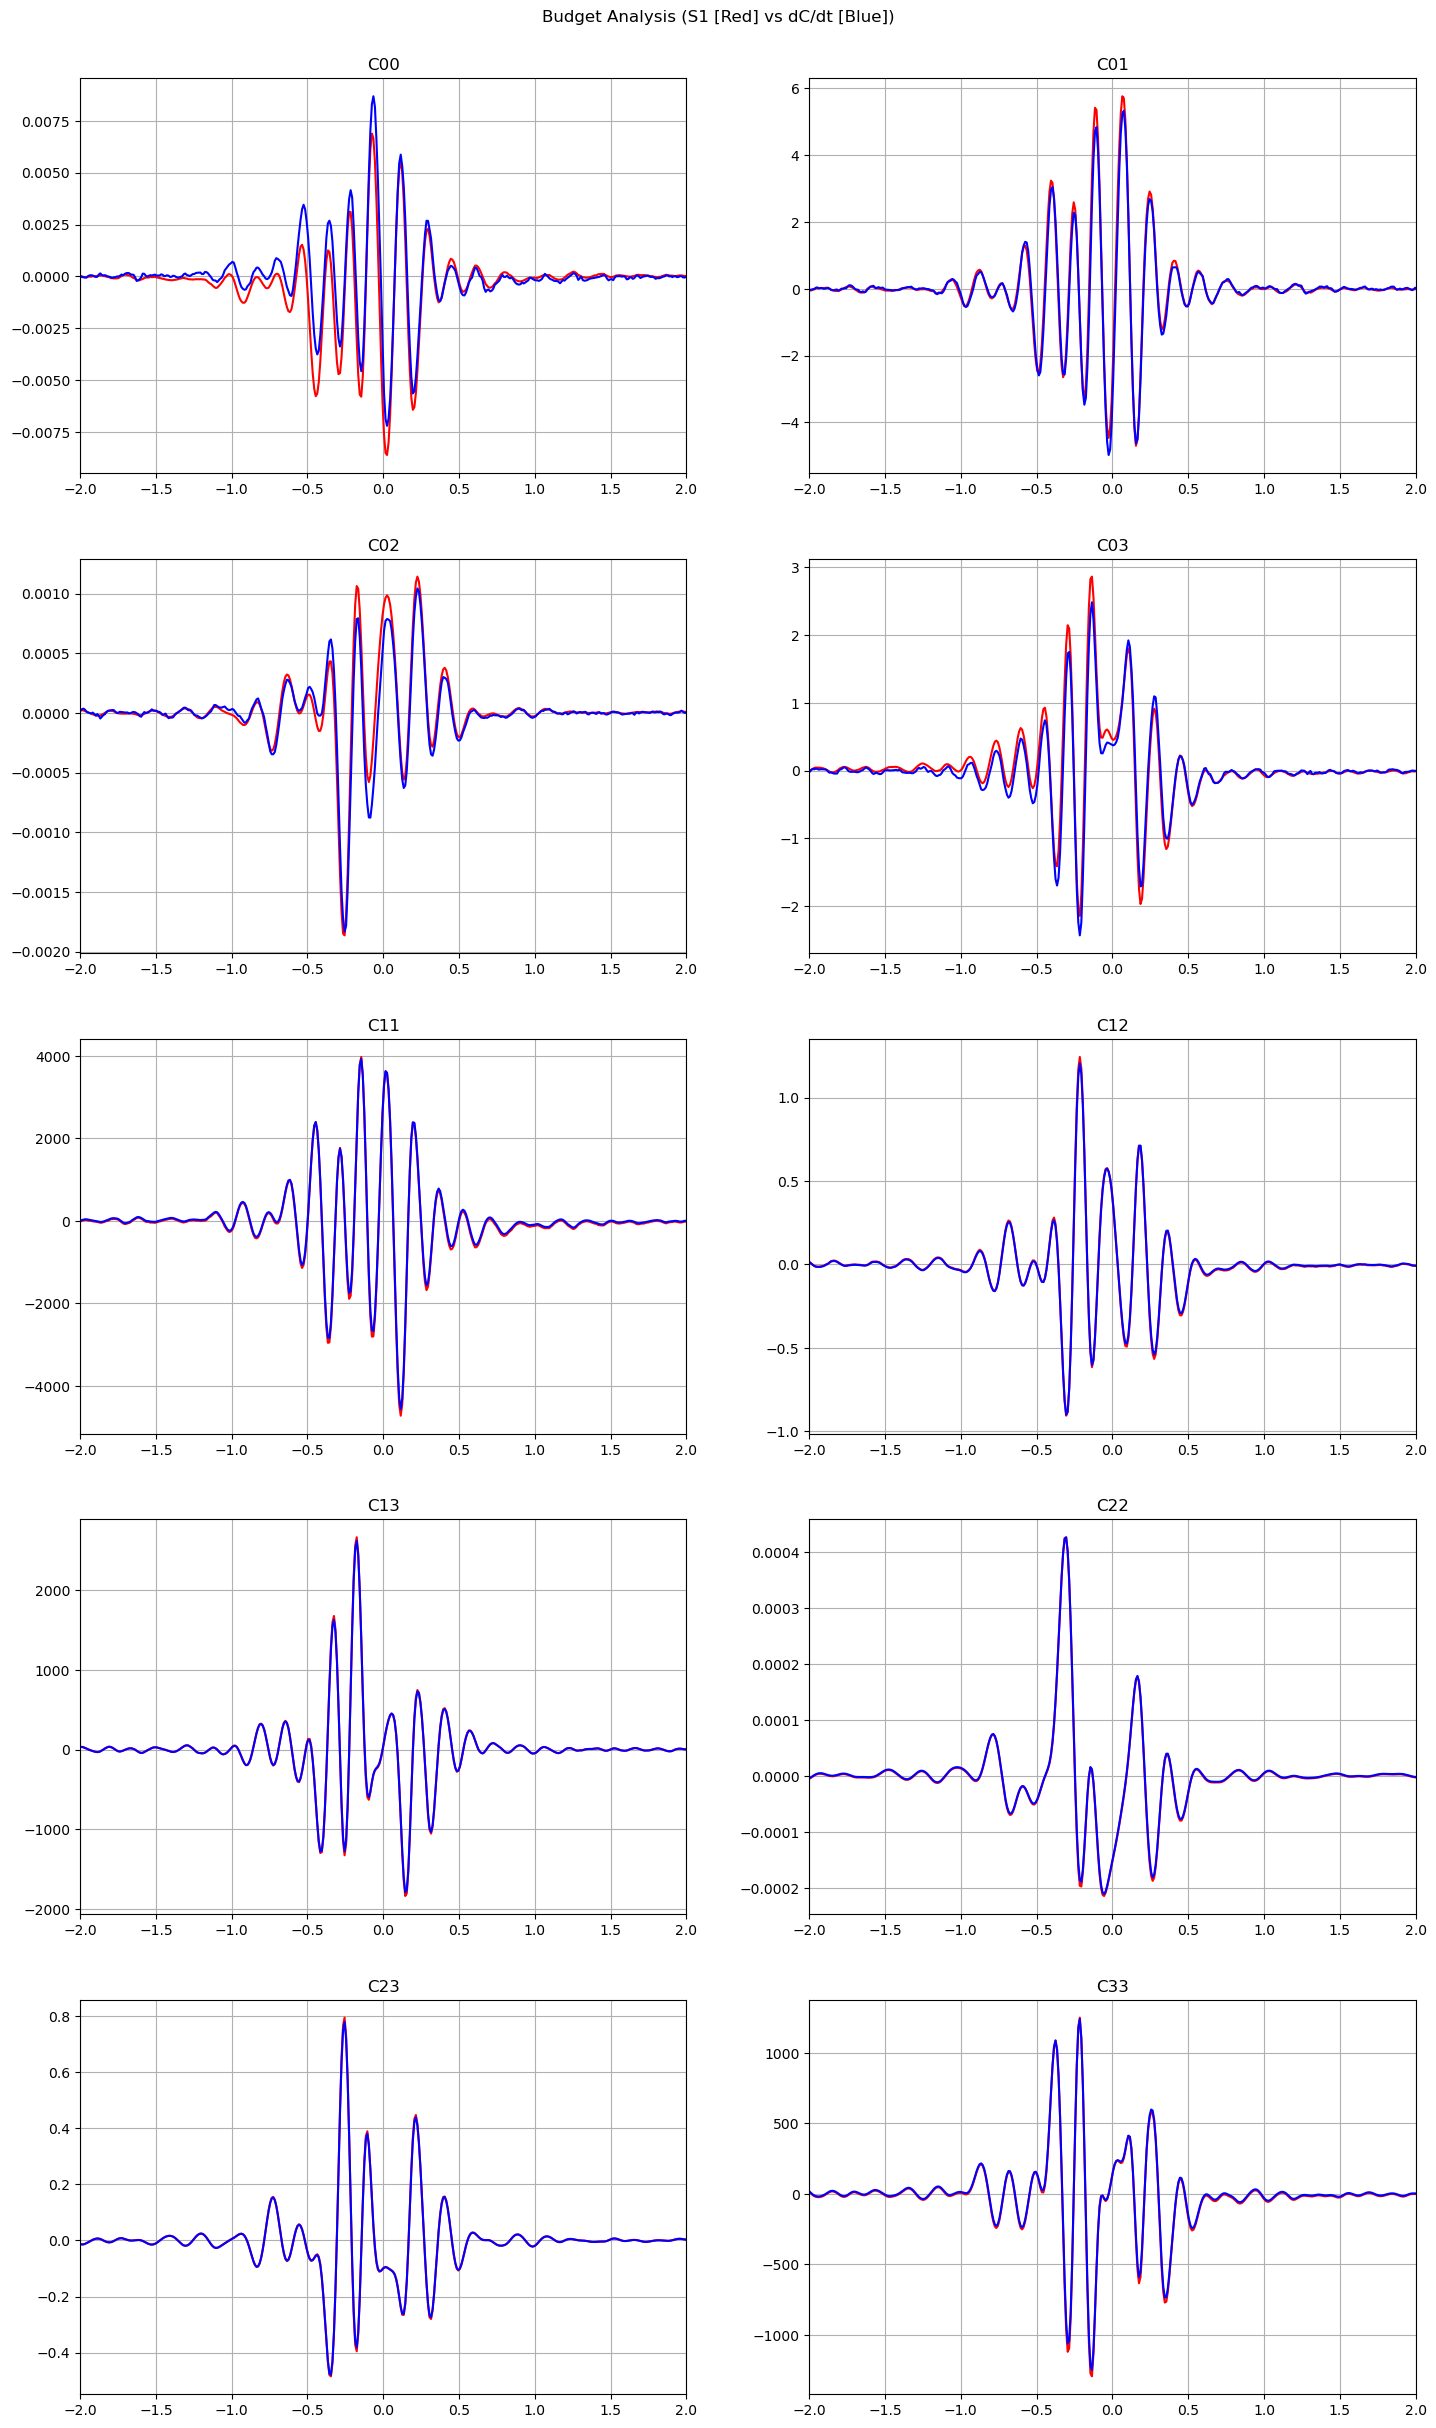

In [ ]:
time_array = np.linspace(-5, 5, 1000)
# time_array = np.arange(2000/10, 2000/10) * dt * 10
#fig, axs = plt.subplots(1,1, figsize = (8, 12))
x_limit = (-2, 2)

fig, axs = plt.subplots(5, 2, figsize=(15, 25))


axs[0, 0].plot(time_array, s1[:, 0, 0],'r')
axs[0, 0].plot(time_array, dC_dt[:, 0, 0],'b')
axs[0, 0].set_title(f'C00')
axs[0, 0].set_xlim(x_limit)
axs[0, 0].grid()

axs[0, 1].plot(time_array, s1[:, 0, 1],'r')
axs[0, 1].plot(time_array, dC_dt[:, 0, 1],'b')
axs[0, 1].set_title(f'C01')
axs[0, 1].set_xlim(x_limit)
axs[0, 1].grid()

axs[1, 0].plot(time_array, s1[:, 0, 2],'r')
axs[1, 0].plot(time_array, dC_dt[:, 0, 2],'b')
axs[1, 0].set_title(f'C02')
axs[1, 0].set_xlim(x_limit)
axs[1, 0].grid()

axs[1, 1].plot(time_array, s1[:, 0, 3],'r')
axs[1, 1].plot(time_array, dC_dt[:, 0, 3],'b')
axs[1, 1].set_title(f'C03')
axs[1, 1].set_xlim(x_limit)
axs[1, 1].grid()

axs[2, 0].plot(time_array, s1[:, 1, 1],'r')
axs[2, 0].plot(time_array, dC_dt[:, 1, 1],'b')
axs[2, 0].set_title(f'C11')
axs[2, 0].set_xlim(x_limit)
axs[2, 0].grid()

axs[2, 1].plot(time_array, s1[:, 1, 2],'r')
axs[2, 1].plot(time_array, dC_dt[:, 1, 2],'b')
axs[2, 1].set_title(f'C12')
axs[2, 1].set_xlim(x_limit)
axs[2, 1].grid()

axs[3, 0].plot(time_array, s1[:, 1, 3],'r')
axs[3, 0].plot(time_array, dC_dt[:, 1, 3],'b')
axs[3, 0].set_title(f'C13')
axs[3, 0].set_xlim(x_limit)
axs[3, 0].grid()

axs[3, 1].plot(time_array, s1[:, 2, 2],'r')
axs[3, 1].plot(time_array, dC_dt[:, 2, 2],'b')
axs[3, 1].set_title(f'C22')
axs[3, 1].set_xlim(x_limit)
axs[3, 1].grid()

axs[4, 0].plot(time_array, s1[:, 2, 3],'r')
axs[4, 0].plot(time_array, dC_dt[:, 2, 3],'b')
axs[4, 0].set_title(f'C23')
axs[4, 0].set_xlim(x_limit)
axs[4, 0].grid()

axs[4, 1].plot(time_array, s1[:, 3, 3],'r')
axs[4, 1].plot(time_array, dC_dt[:, 3, 3],'b')
axs[4, 1].set_title(f'C33')
axs[4, 1].set_xlim(x_limit)
axs[4, 1].grid()


plt.suptitle(f"Budget Analysis (S1 [Red] vs dC/dt [Blue])")



#plt.subplots_adjust(wspace=.4)
#plt.subplots_adjust(hspace=.4)
plt.tight_layout(pad = 3)
plt.show()

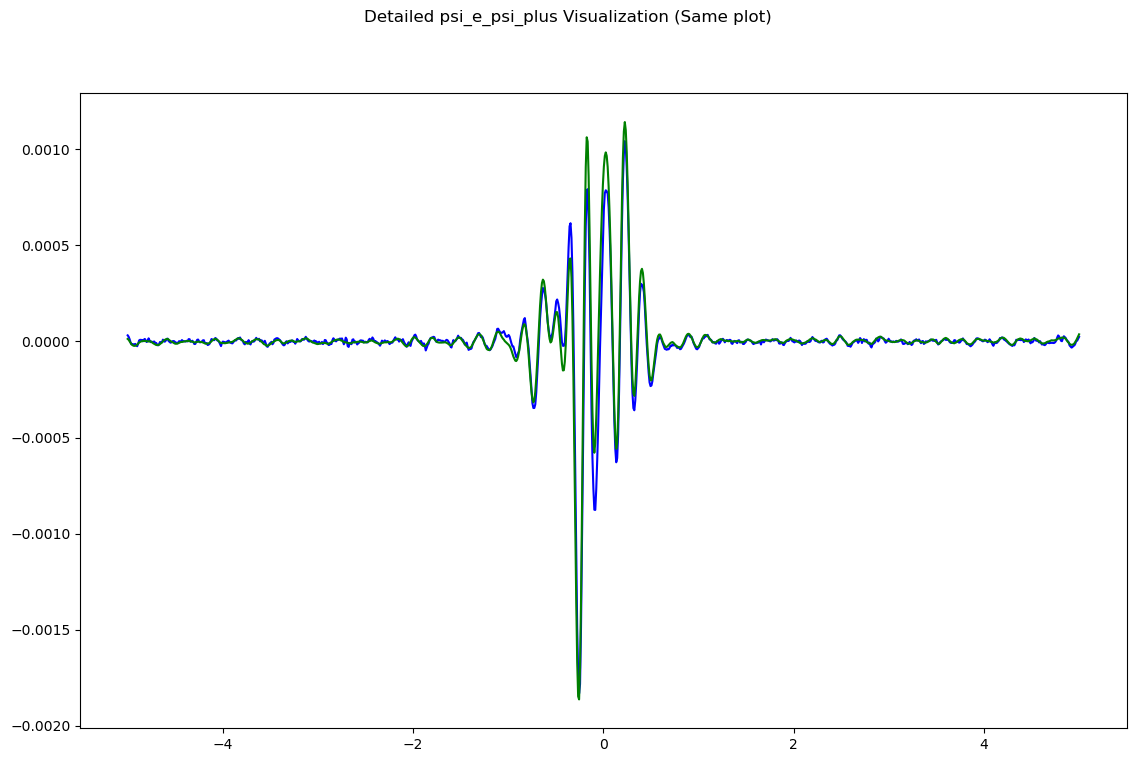

In [ ]:
x_limit = (-2, 2)

fig, axs = plt.subplots(1, 1, figsize=(12, 8))

sumOfIndividualItems = (-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))) + ((k/k_e_square) * average_b_e_psi_plus_list) + ((-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list) + ((-k/(2*k_plus_square) * (np.square(m_u) - k_e_square) * average_UK_e_psi_e)) + ((-k/(2*k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus))

# sumOfIndividualItems = (-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))) + ((k/k_e_square) * average_b_e_psi_plus_list - ((k/k_e_square) * average_b_e_psi_plus_list[0])) + ((-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list - ((-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list[0])) + ((-k/(2*k_plus_square) * (np.square(m_u) - k_e_square) * average_UK_e_psi_e) - ((-k/(2*k_plus_square) * (np.square(m_u) - k_e_square) * average_UK_e_psi_e[0]))) - ((-k/(2*k_plus_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus) - ((-k/(2*k_plus_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus[0])))

# axs.plot(time_array, dC_dt[:, 0, 2],'r')
axs.plot(time_array, dC_dt[:, 0, 2], 'b')
axs.plot(time_array, sumOfIndividualItems,'g')
# axs.plot(time_array, s1[:, 0, 2])lambda_values_filled = np.nan_to_num(lambda_values_truncat

plt.suptitle(f"Detailed psi_e_psi_plus Visualization (Same plot)")



#plt.subplots_adjust(wspace=.4)
#plt.subplots_adjust(hspace=.4)
plt.tight_layout(pad = 3)
plt.show()

In [ ]:
C00 = average_C_matrix[:, 0, 0]
time_array = np.linspace(-5, 5, 1000)

spline = CubicSpline(time_array, C00)
# spline_derivative = spline.derivative()
# dc02 = spline_derivative(time_array)

time_fine = np.linspace(-5, 5, 10000)
C00_fine = spline(time_fine)
C00_derivative_fine = spline.derivative()(time_fine)
C00_derivative_fine = C00_derivative_fine[9::10]

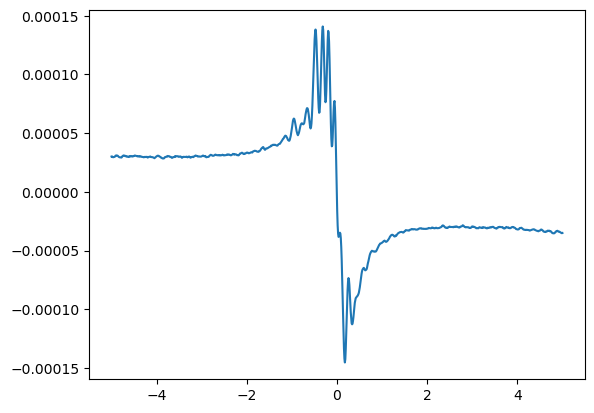

In [ ]:
plt.plot(time_array, average_U * average_k_e_psi_e_list)

In [ ]:
U_k_e_psi_e = np.array([
    np.array(u) * np.array(k)
    for u, k in zip(df['u_list'], df['k_e_psi_e_list'])
])


In [ ]:
U_k_e_psi_e_average = average_arrays(*list(U_k_e_psi_e))

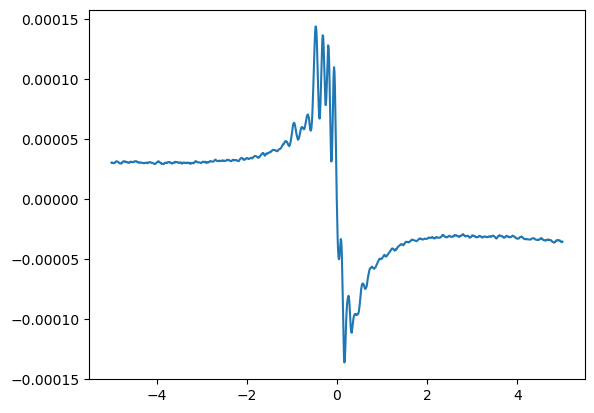

In [ ]:
plt.plot(time_array, U_k_e_psi_e_average)

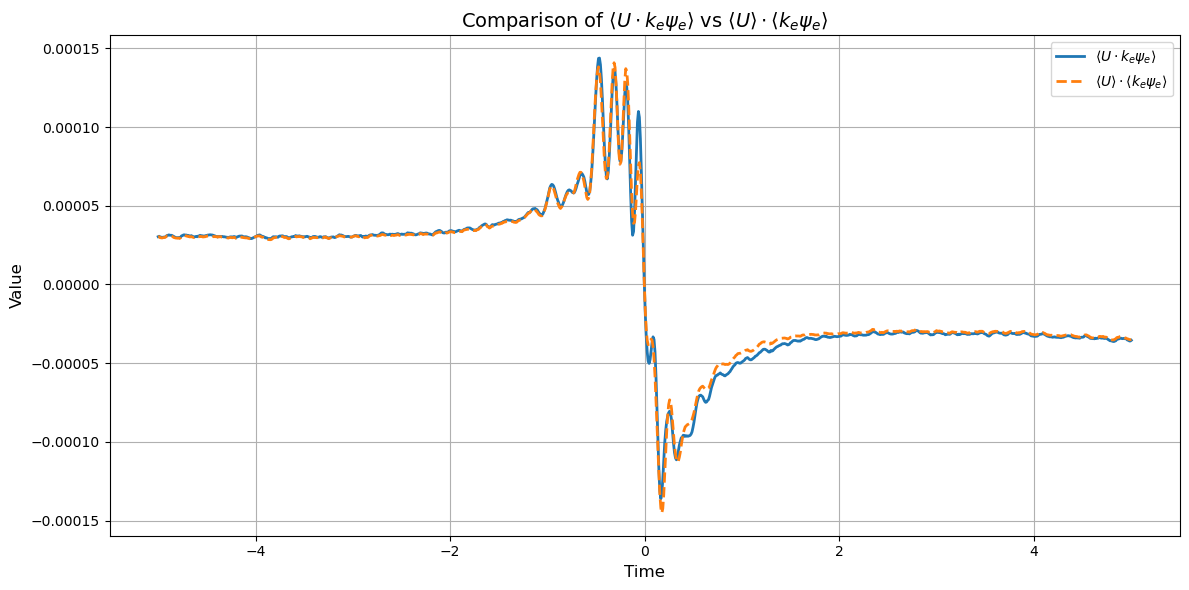

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(time_array, U_k_e_psi_e_average, label=r'$\langle U \cdot k_{e}\psi_{e} \rangle$', linewidth=2)
ax.plot(time_array, average_U * average_k_e_psi_e_list, 
        label=r'$\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', linestyle='--', linewidth=2)

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title(r'Comparison of $\langle U \cdot k_{e}\psi_{e} \rangle$ vs $\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
standard_error_diff= np.std(U_k_e_psi_e_average-(average_U * average_k_e_psi_e_list), axis=0) / np.sqrt(1000)

In [ ]:
standard_error_diff

1.2377912030824288e-07

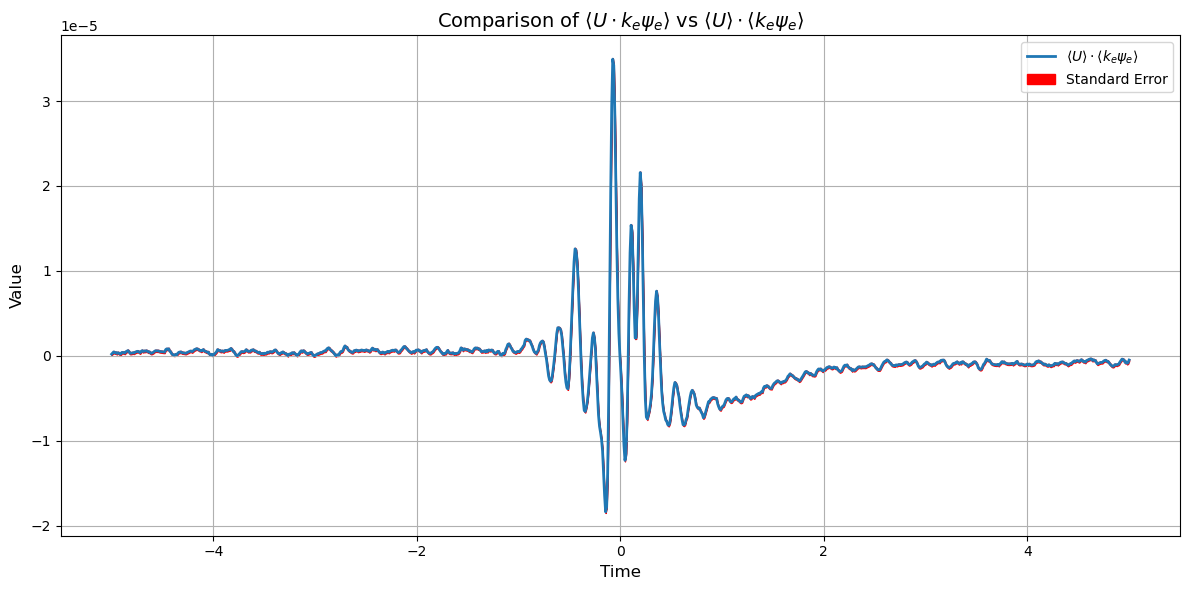

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
calc_array = U_k_e_psi_e_average-(average_U * average_k_e_psi_e_list)
# ax.plot(time_array, U_k_e_psi_e_average, label=r'$\langle U \cdot k_{e}\psi_{e} \rangle$', linewidth=2)
ax.plot(time_array, calc_array,
        label=r'$\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', linestyle='-', linewidth=2)

ax.fill_between(time_array, 
                calc_array - standard_error_diff, 
                calc_array + standard_error_diff, 
                alpha=1, label='Standard Error',color='red')

# ax.errorbar(time_array, 
#             U_k_e_psi_e_average - (average_U * average_k_e_psi_e_list), 
#             yerr=standard_error_diff, 
#             label=r'$\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', 
#             linestyle='--', 
#             linewidth=2, 
#             capsize=3)

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title(r'Comparison of $\langle U \cdot k_{e}\psi_{e} \rangle$ vs $\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True)

plt.tight_layout()
plt.show()



In [ ]:
def std_across_axis(arrays):
    return np.std(arrays, axis=0)

In [ ]:
U_k_e_psi_e_stdev = std_across_axis(U_k_e_psi_e)

In [ ]:
U_k_e_psi_e_stdev.shape

(1000,)

In [ ]:
U_k_e_psi_e_stError = U_k_e_psi_e_stdev/100

In [ ]:
U_k_e_psi_e.shape

(5000, 1000)

In [ ]:
U_k_e_psi_e_average = average_arrays(*list(U_k_e_psi_e))

In [ ]:
U_k_e_psi_e_average.shape

(1000,)

In [ ]:
average_U_Ke_psi_e = average_U * average_k_e_psi_e_list
average_U_Ke_psi_e.shape

(1000,)

In [ ]:
std_U = np.std(df['u_list'].tolist(), axis=0)
std_K_e_psi_e = np.std(df['k_e_psi_e_list'].tolist(), axis=0)
std_U.shape, std_K_e_psi_e.shape

((1000,), (1000,))

In [ ]:
std_err_U = std_U / 100
std_err_k_e_psi_e = std_K_e_psi_e / 100

In [ ]:
st_err_U_K_e_psi_e = average_U * average_k_e_psi_e_list * np.sqrt((std_err_U / average_U) ** 2 + (std_err_k_e_psi_e / average_k_e_psi_e_list) ** 2)
st_err_U_K_e_psi_e.shape

(1000,)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
standard_error_diff = np.sqrt(st_err_U_K_e_psi_e ** 2 + U_k_e_psi_e_stError ** 2)
calc_array = U_k_e_psi_e_average - average_U_Ke_psi_e
# ax.plot(time_array, U_k_e_psi_e_average, label=r'$\langle U \cdot k_{e}\psi_{e} \rangle$', linewidth=2)
ax.plot(time_array, calc_array,
        linestyle='-', linewidth=2)

ax.fill_between(time_array, 
                calc_array - standard_error_diff, 
                calc_array + standard_error_diff, 
                alpha=1, label='Standard Error',color='red')

# ax.errorbar(time_array, 
#             U_k_e_psi_e_average - (average_U * average_k_e_psi_e_list), 
#             yerr=standard_error_diff, 
#             label=r'$\langle U \rangle \cdot \langle k_{e}\psi_{e} \rangle$', 
#             linestyle='--', 
#             linewidth=2, 
#             capsize=3)

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title(r'$\langle U \cdot \psi_{e}^2 \rangle$ - $\langle U \rangle \cdot \langle \psi_{e}^2 \rangle$ (Reversal Ensemble)', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True)

plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (911682007.py, line 6)

3Corr For psi e psi plus Interesting, so this does include the 3corr

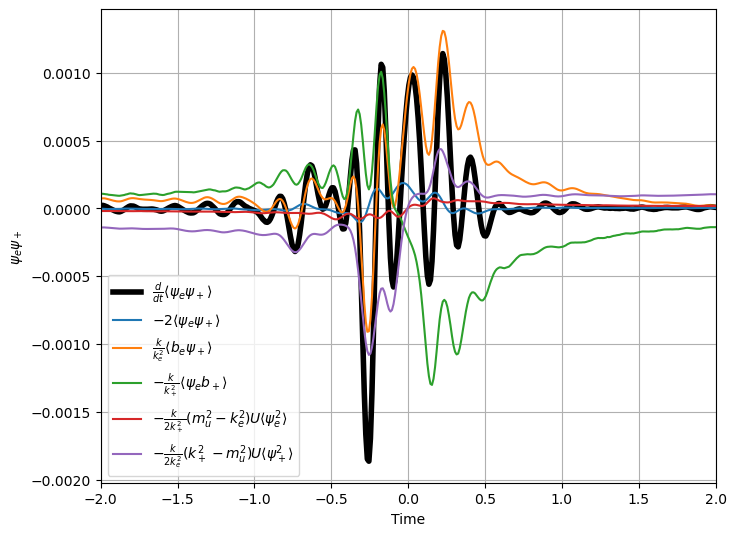

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot all terms with LaTeX-formatted labels
ax.plot(time_array, sumOfIndividualItems, '-k', lw=4, label=r"$\frac{d}{dt} \langle \psi_e \psi_+ \rangle$")
ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)),
        label=r"$-2 \langle \psi_e \psi_+ \rangle$")
ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list,
        label=r"$\frac{k}{k_e^2} \langle b_e \psi_+ \rangle$")
ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list,
        label=r"$-\frac{k}{k_+^2} \langle \psi_e b_+ \rangle$")
ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e),
        label=r"$-\frac{k}{2k_+^2} (m_u^2 - k_e^2) U \langle \psi_e^2 \rangle$")
ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus),
        label=r"$-\frac{k}{2k_e^2} (k_+^2 - m_u^2) U \langle \psi_+^2 \rangle$")

ax.set_xlim(x_limit)
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel(r"$\psi_e \psi_+$")

# Clean legend formatting
ax.legend(loc='best', fontsize=10)

plt.tight_layout(pad=3)
plt.show()

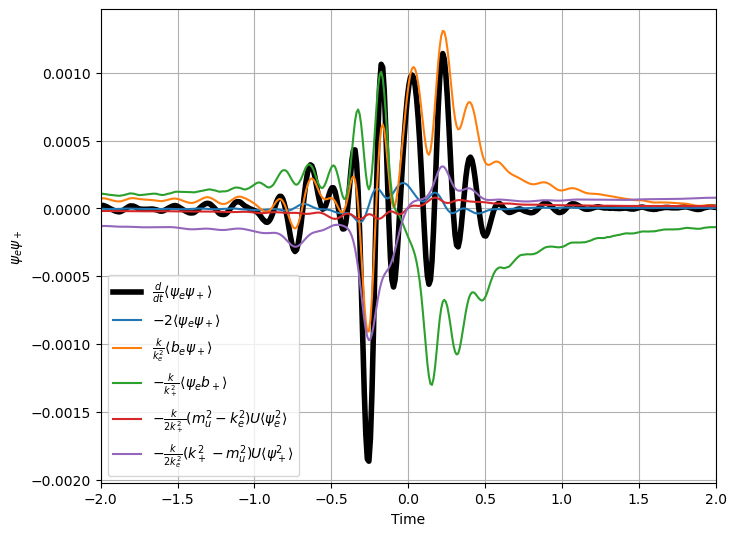

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot all terms with LaTeX-formatted labels
ax.plot(time_array, sumOfIndividualItems, '-k', lw=4, label=r"$\frac{d}{dt} \langle \psi_e \psi_+ \rangle$")
ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)),
        label=r"$-2 \langle \psi_e \psi_+ \rangle$")
ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list,
        label=r"$\frac{k}{k_e^2} \langle b_e \psi_+ \rangle$")
ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list,
        label=r"$-\frac{k}{k_+^2} \langle \psi_e b_+ \rangle$")
ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_U * average_k_e_psi_e_list),
        label=r"$-\frac{k}{2k_+^2} (m_u^2 - k_e^2) U \langle \psi_e^2 \rangle$")
ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_U * average_k_e_psi_plus_list),
        label=r"$-\frac{k}{2k_e^2} (k_+^2 - m_u^2) U \langle \psi_+^2 \rangle$")

ax.set_xlim(x_limit)
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel(r"$\psi_e \psi_+$")

# Clean legend formatting
ax.legend(loc='best', fontsize=10)

plt.tight_layout(pad=3)
plt.show()